# CA 1 Data Visualisation

GITHUB: https://github.com/izazaka/Data
https://github.com/CCT-Dublin/data-visualisation-techniques-ca1-izazaka

Minimum Requirements  
  
Scenario:  
You have been retained by a retail company to analyse a dataset based on video games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.    
Each answer MUST have a separate and different visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must be generated using python.   
The companies CTO also requires you to rationalize all the decisions that you have made in your Jupyter Notebook report.    
This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant.   
  


Requirements  

You are required to use the dataset contained within the file “vgsales.csv” and then answer the following questions:  

Part 1: (Column Names are denoted by quotation marks)  [0-40]
What are the top 5 games by global sales?  
Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  
What is the distribution of the most popular 4 game genres?  
Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  
What are the 3 most common “developer” in the dataset? 

Part 2   [0-10]
You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario. 

Part3:   [0-50] 
You must explain, in detail,    
why you chose the specific methods to engineer the data and how you achieved this in python (Part 1/Part 2)  
why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  
what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  
what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)    
Note that all written work MUST be completed in Jupyter Notebook Markdown (please review “Jupyter Notebook Tutorial” Notes in Moodle if you are unsure of this), NOT in code comments.
  
All Code must be included in code blocks (As normal). No other upload will be accepted.  
  


## COLOUR PALLET
#FD5551 RED
#8CB8EF BLUE
#F38BD6 PINK
#00D3C2 GREEN
#9F9D9E GRAY

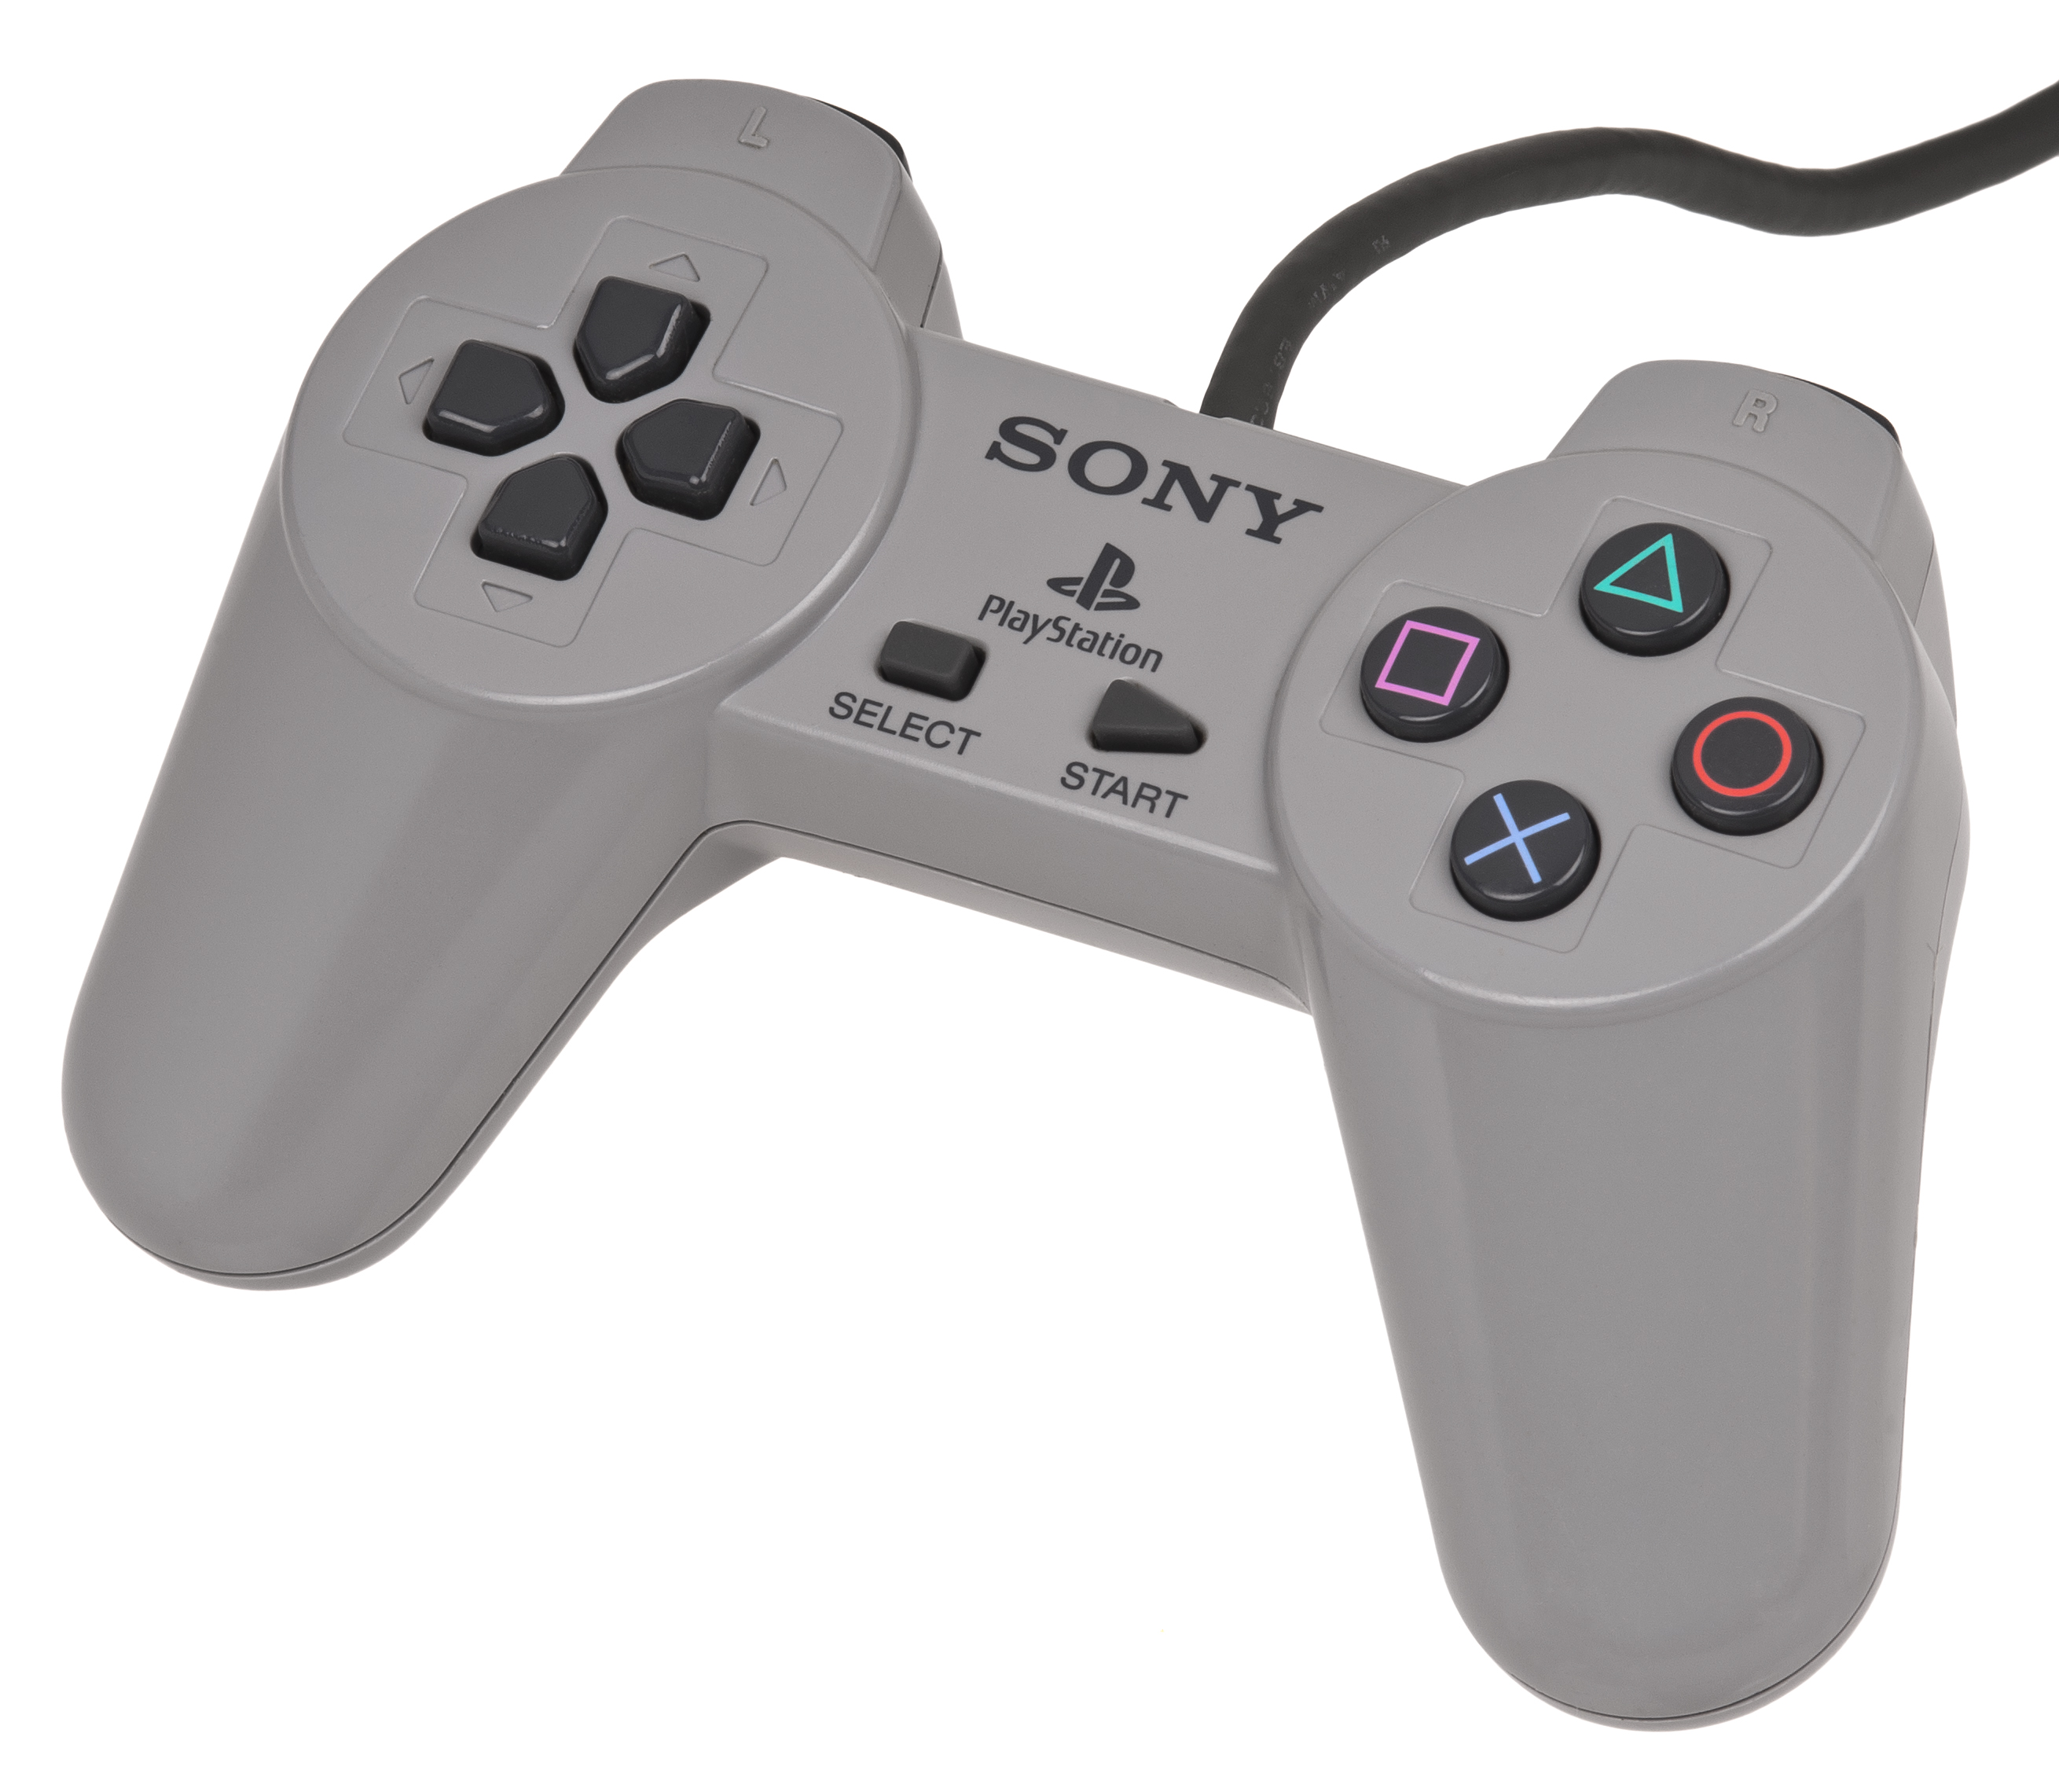

## Libraries

In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

from scipy import stats

from sklearn.preprocessing import LabelEncoder

sns.set()

# EDA

The Exploratory Data Analysis (EDA) in our raw data is a crucial task that helps us understand the type of data we are dealing with and the necessary approaches to obtain satisfactory results not only in Machine Learning Algorithms but also in visualisations and probabilistic questions that we might need to answer. EDA was originally developed in 1970 by the American mathematician John Tukey (IBM, 2023) and consists of checking the characteristics of the dataset such as shape, size, type of features and observations, the presence or absence of missing or duplicated values, the distribution of the data, among others.

In [2]:
vg = pd.read_csv("vgsales.csv")

In [3]:
vg.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


In [4]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
vg.shape

(16719, 16)

In [6]:
vg.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


### Missing Values

To answer the five questions of the first part of this project we will need to analyse the following features:

- Global_Sales: the Global Sales of each videogame;
- NA_Sales: the North America Sales of each videogame;
- JP_Sales: the Japanese Sales of each videogame;
- Genre: type of game;
- Year_of_Release: the year of which each video game was released;
- EU_Sales: the European Sales of each videogame;
- Developer: the name of the Developer.



None of the sales columns have missing values. The "Genre" column has only 2 "NaN", "Year of Release'' 269 and "Developer" has the highest number totaling to 6623. The proportion of missing values for all columns is shown in Graphic 1. The colours were chosen based on the classic controller of the Playstation 1, with the hatch referring to the "circle button" and the blue lines to the "x button". Both buttons are typically used to confirm choices. The threshold of 40% was chosen to highlight the proportion of missing values in the column "Developer" that will be used on the fifth question. 


Each of the three columns containing missing values was analysed separately in order to determine the best approach in dealing with them. In the first case (Genre), the idea was to manually  impute the missing values by searching the names of the video games on the Internet. However, the rows containing missing values are the same for the columns "Genre" and "Name" which makes the strategy impractical. As these rows only represent 0.011962% of the total, there will not be a significant statistical loss by dropping them. 


As for the "Year of Release'' the missing values represent 1.608948% of the total. The mode is the year of 2008 with 1427 observations followed by 2009 with 1426. At first I thought to impute the missing values not with the mode but randomly distributed them into the seven years with the 50% of the observations (2008, 2009, 2010, 2007, 2011, 2006 and 2005) so the distribution would not be as impacted as if I had just used the mode. 

I decided to drop the rows with "NaN" after plotting Graphic 2, which lead to the observation that from our range (1980 - 2020) two years did not have any observations (2018 and 2019) which might explain the missing values. A quick consultation on the IMDb (IMDb, 2018) website shows a total of 1498 and 1551 releases for those two years respectively. Once it is not possible to know the reason why these values are missing and the proportion is low I also decided to drop them.

When the column "Developer" is analysed the situation becomes more complex. The answer of the fifth question might change depending on the strategy chosen due the high amount of missing values (39.613613%). The Graphic 3 shows the distributions of four performed experiments:

- The original data with and without the missing values;
- The imputation using the mode of the groups according to the "Publisher" column;
- The imputation using the mode of the groups according to the "Platform" column;
- The imputation using the mode of the groups according to the combination of both columns.


The idea is to minimise the impact on the distribution by imputting a meaningful and diverse range of variables instead of relying just on the unique value of the mode. Firstly, I selected the column "Publisher" to group the dataset and replace the missing values on the Developer column based on the mode within each group. In case there was no mode or all the values were NaN within the group, the returned value would be "Unknown". The same was performed with the feature "Platform". 

Among all the features on the dataset those two would be the logical ones as Publishers and Developers work closely to launch new games in exclusively platforms or in a range of them (Zegarra, 2020). Platform is the place where the game is played, while the Publisher is responsible for distributing, finacing and marketing and finally, the developer is the creative part. In many cases, there is overlap between the responsibilities of publishers and developers. Another common practice in the industry is the merger of development and publishing in one large organisation. 


The number of "Unknown" values were 707 in the first scenario and of 1099 in the second using "Platform". Both results were still unsatisfactory; since "Unknown" and "NaN'' would have the same statistical value, they would be both considered missing values. The strategy to overcome this problem was to combine both features; however two factors should be considered:

1) When the imputation was done with the feature "Publisher", the number of "Unknown" was lower (707) than when using "Platform" (1099);
2) The distribution of the data using "Platform" for imputation was closer to the Original one without missing values.

The imputation would occur first grouping the observations with one feature, and the "Unknown" resulting values of this first step will be replaced by the mode of the groups using the second feature. The order of the chosen feature might impact the shape of the distribution and the answer of the fifth question. To decide the best option, two variables will be created: 
1) "Developer_C1": Publisher then Platform;
2) "Developer_C2": Platform then Publisher.

The outcome of both approaches resulted in features with neither "NaN'' nor "Unknown" values. 


In [7]:
vg.replace("missing_value", pd.NA, inplace = True)

In [8]:
vg["Genre"].mode()

0    Action
Name: Genre, dtype: object

In [9]:
print(vg.iloc[vg[vg['Genre'].isnull()].index])

      Name Platform  Year_of_Release Genre              Publisher  NA_Sales  \
659    NaN      GEN           1993.0   NaN  Acclaim Entertainment      1.78   
14246  NaN      GEN           1993.0   NaN  Acclaim Entertainment      0.00   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
659        0.53      0.00         0.08          2.39           NaN   
14246      0.00      0.03         0.00          0.03           NaN   

       Critic_Count User_Score  User_Count Developer Rating  
659             NaN        NaN         NaN       NaN    NaN  
14246           NaN        NaN         NaN       NaN    NaN  


In [10]:
vg.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [11]:
isnull = vg.isnull().sum()

nperc = pd.DataFrame((isnull / (len(vg))) * 100)

nperc.columns = ["% of NaN"]

nperc.head(20)

,% of NaN
Name,0.011962
Platform,0.000000
Year_of_Release,1.608948
Genre,0.011962
Publisher,0.322986
NA_Sales,0.000000
EU_Sales,0.000000
JP_Sales,0.000000
Other_Sales,0.000000
Global_Sales,0.000000


### Graphic 1 - Proportion of Missing Values

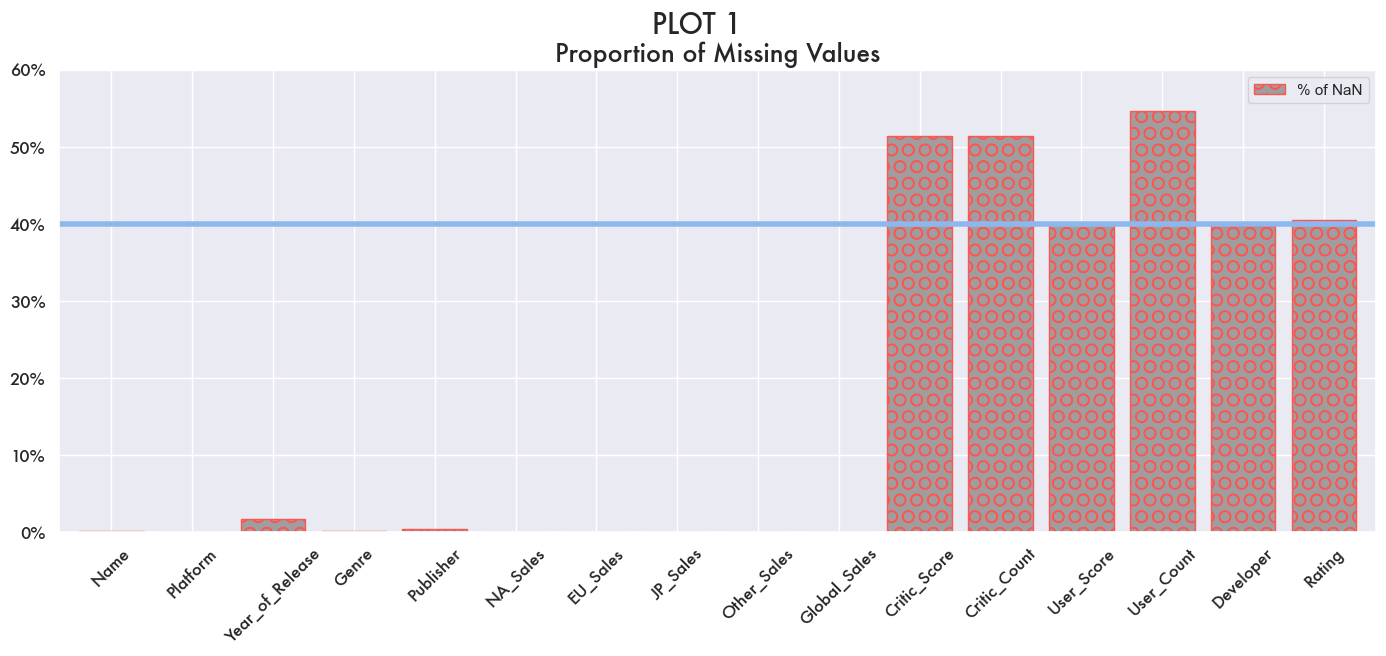

In [12]:
nperc.plot(kind = "bar", color = "#9F9D9E", figsize = (17,6),
          width = 0.8, edgecolor = "#FD5551", hatch = "O", 
          linestyle = "-")

plt.axhline(y = 40, linewidth = 4, color = "#8CB8EF", 
           linestyle = "-")


plt.suptitle("PLOT 1", font = "Futura", fontsize = 20)
plt.title("Proportion of Missing Values", font = "Futura", fontsize = 18)

plt.yticks(ticks = plt.yticks()[0], labels=[f"{int(tick)}%" for tick in plt.yticks()[0]], font = "Futura")
plt.xticks(rotation = 45, font = "Futura");

In [13]:
vg.dropna(subset = ["Year_of_Release"], inplace = True)

In [14]:
vg['Year_of_Release'] = vg['Year_of_Release'].astype(int)

### Graphic 2 - Number of Variables by Year of Release

The bars on the vertical make it easier to read the years and the aspect 2 fits the plot on the markdown so we can see all the years.

In this plot it is possible to see the mode 2018 (has one more missing value than 2009), and the years that do not have any observatios (2018 and 2019) in our range (1980 - 2020).

The colors were chosen based on the controller from the PlayStation 1. 

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

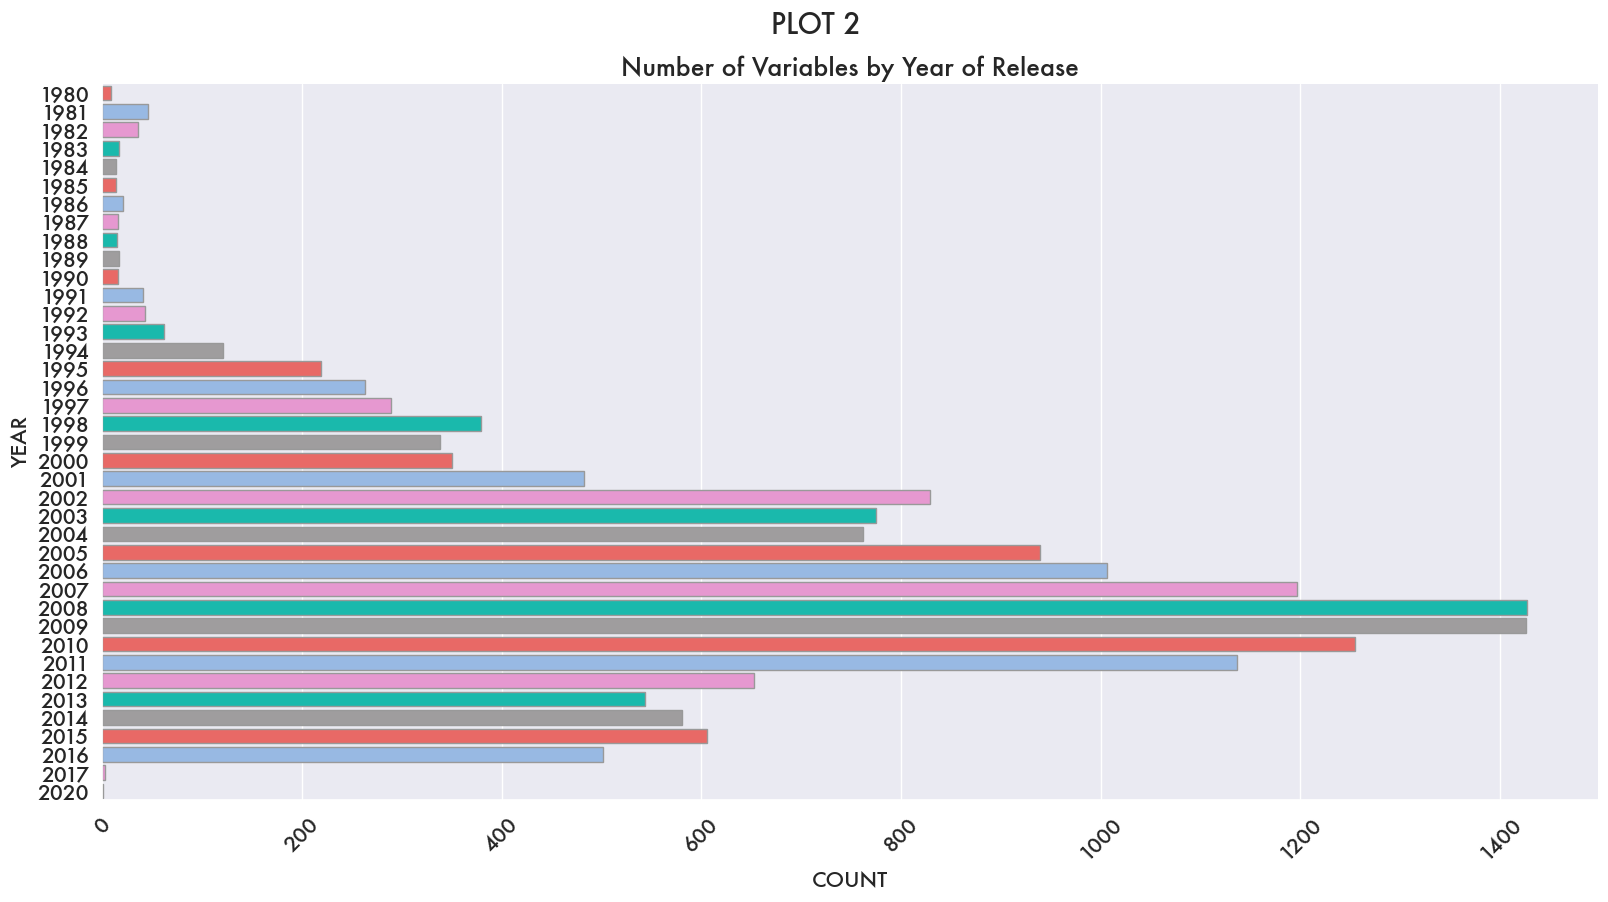

In [15]:
plt.figure(figsize = (20, 10))

sns.catplot(data = vg, y = "Year_of_Release", kind = "count", 
            palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"], 
            edgecolor = "0.6", height = 8, aspect = 2)

plt.title("Number of Variables by Year of Release", y = 1, font = "Futura", fontsize = 18)
plt.suptitle("PLOT 2", y = 1.07, font = "Futura", fontsize = 20)
plt.xlabel("COUNT", font = "Futura", fontsize = 15)
plt.ylabel("YEAR", font = "Futura", fontsize = 15)

plt.yticks(font = "Futura", fontsize = 15)
plt.xticks(rotation = 45, font = "Futura", fontsize = 15)
plt.grid(axis = "x", linestyle = "-", alpha = 1)  

plt.show()

In [16]:
vg["Year_of_Release"].value_counts()

Year_of_Release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: count, dtype: int64

In [17]:
vg.tail(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16718,Winning Post 8 2016,PSV,2016,Simulation,Tecmo Koei,0.0,0.0,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


### Imputing with the Mode

In [18]:
vg["Developer_M"] = vg["Developer"].fillna(vg["Developer"].mode()[0])

In [19]:
vg["Developer"].mode()

0    Ubisoft
Name: Developer, dtype: object

In [20]:
vg["Developer"].nunique()

1680

In [21]:
vg["Developer"].unique()

array(['Nintendo', nan, 'Good Science Studio', ..., 'Big Red Software',
       'Atomic Games', 'Interchannel-Holon'], dtype=object)

### Imputing by Publisher

In [22]:
vg["Developer_P"] = vg.groupby("Publisher")["Developer"].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "Unknown"))

vg.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Developer_M,Developer_P
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,Nintendo,Nintendo


In [23]:
vg[["Publisher", "Developer", "Developer_P"]].tail(1)

,Publisher,Developer,Developer_P
16718,Tecmo Koei,NaN,Omega Force


In [24]:
mostP = vg["Developer_P"].value_counts()[vg["Developer_P"].value_counts() > vg["Developer"].value_counts().max()]
mostP.head(20)

Developer_P
Unknown                   707
Namco                     683
Konami                    604
Nintendo                  459
EA Sports                 385
SCEA San Diego Studios    346
Ubisoft                   346
Sega                      345
Capcom                    340
Activision                290
Omega Force               269
THQ                       253
Name: count, dtype: int64

In [25]:
difference = vg["Developer_P"].value_counts() - vg["Developer"].value_counts().max()
difference.head()

Developer_P
Unknown      506
Namco        482
Konami       403
Nintendo     258
EA Sports    184
Name: count, dtype: int64

### Imputing by Platform

In [26]:
vg["Developer_PP"] = vg.groupby("Platform")["Developer"].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "Unknown"))

In [27]:
vg[["Publisher", "Developer", "Developer_P", "Developer_PP"]].head(1)

,Publisher,Developer,Developer_P,Developer_PP
0,Nintendo,Nintendo,Nintendo,Nintendo


In [28]:
mostPP = vg["Developer_PP"].value_counts()[vg["Developer_PP"].value_counts() > vg["Developer"].value_counts().max()]
mostPP.head(10)

Developer_PP
EA Canada            1369
Ubisoft              1363
EA Sports            1186
Capcom               1118
Unknown              1099
Nintendo              396
Vicarious Visions     371
TT Games              347
Name: count, dtype: int64

### Combining and Imputing 

#### Publisher first then Platform

In [29]:
P = vg.groupby("Publisher")["Developer"].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

PP = vg.groupby("Platform")["Developer"].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

vg["Developer_C1"] = P.combine_first(PP)

vg.tail(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Developer_M,Developer_P,Developer_PP,Developer_C1
16718,Winning Post 8 2016,PSV,2016,Simulation,Tecmo Koei,0.0,0.0,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Ubisoft,Omega Force,TT Games,Omega Force


In [30]:
combined = vg["Developer_C1"].value_counts()[vg["Developer_C1"].value_counts() > vg["Developer"].value_counts().max()]
combined.head(20)

Developer_C1
Namco                     683
Konami                    604
Nintendo                  494
EA Sports                 486
Capcom                    475
Ubisoft                   416
SCEA San Diego Studios    346
Sega                      345
EA Canada                 296
Activision                290
Omega Force               269
THQ                       253
Name: count, dtype: int64

#### Platform first then Publisher

In [31]:
P = vg.groupby("Platform")["Developer"].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

PP = vg.groupby("Publisher")["Developer"].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

vg["Developer_C2"] = P.combine_first(PP)

vg.tail(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Critic_Count,User_Score,User_Count,Developer,Rating,Developer_M,Developer_P,Developer_PP,Developer_C1,Developer_C2
16718,Winning Post 8 2016,PSV,2016,Simulation,Tecmo Koei,0.0,0.0,0.01,0.0,0.01,...,NaN,NaN,NaN,NaN,NaN,Ubisoft,Omega Force,TT Games,Omega Force,TT Games


In [32]:
combined = vg["Developer_C2"].value_counts()[vg["Developer_C2"].value_counts() > vg["Developer"].value_counts().max()]
combined.head(20)

Developer_C2
Ubisoft              1376
EA Canada            1369
EA Sports            1211
Capcom               1165
Nintendo              596
Vicarious Visions     372
TT Games              347
Konami                227
Name: count, dtype: int64

In [33]:
dist1 = pd.DataFrame(vg["Developer"].dropna())
dist2 = pd.DataFrame(vg[vg["Developer_P"] != "Unknown"])
dist3 = pd.DataFrame(vg[vg["Developer_PP"] != "Unknown"])
dist4 = pd.DataFrame(vg[vg["Developer_C1"] != "Unknown"])
dist5 = pd.DataFrame(vg[vg["Developer_C2"] != "Unknown"])

In [34]:
encoder = LabelEncoder()

dist1["Original_NM"] = encoder.fit_transform(dist1["Developer"])
dist2["Developer_P_NM"] = encoder.fit_transform(dist2["Developer_P"])
dist3["Developer_PP_NM"] = encoder.fit_transform(dist3["Developer_PP"])
dist4["Developer_C1"] = encoder.fit_transform(dist4["Developer_C1"])
dist5["Developer_C2"] = encoder.fit_transform(dist5["Developer_C2"])



vg["Developer_P_E"] = encoder.fit_transform(vg["Developer_P"])
vg["Developer_PP_E"] = encoder.fit_transform(vg["Developer_PP"])
vg["Developer_OE"] = encoder.fit_transform(vg["Developer"])
vg["Developer_C1_E"] = encoder.fit_transform(dist4["Developer_C1"])
vg["Developer_C2_E"] = encoder.fit_transform(dist5["Developer_C2"])
vg["Developer_M_E"] = encoder.fit_transform(vg["Developer_M"])

## Distributions

### Figure 1

The distribution of the Original dataset without missing values is closest to the imputation with the "Platform" feature. Although the scale is different, the number of peaks are similar. 

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

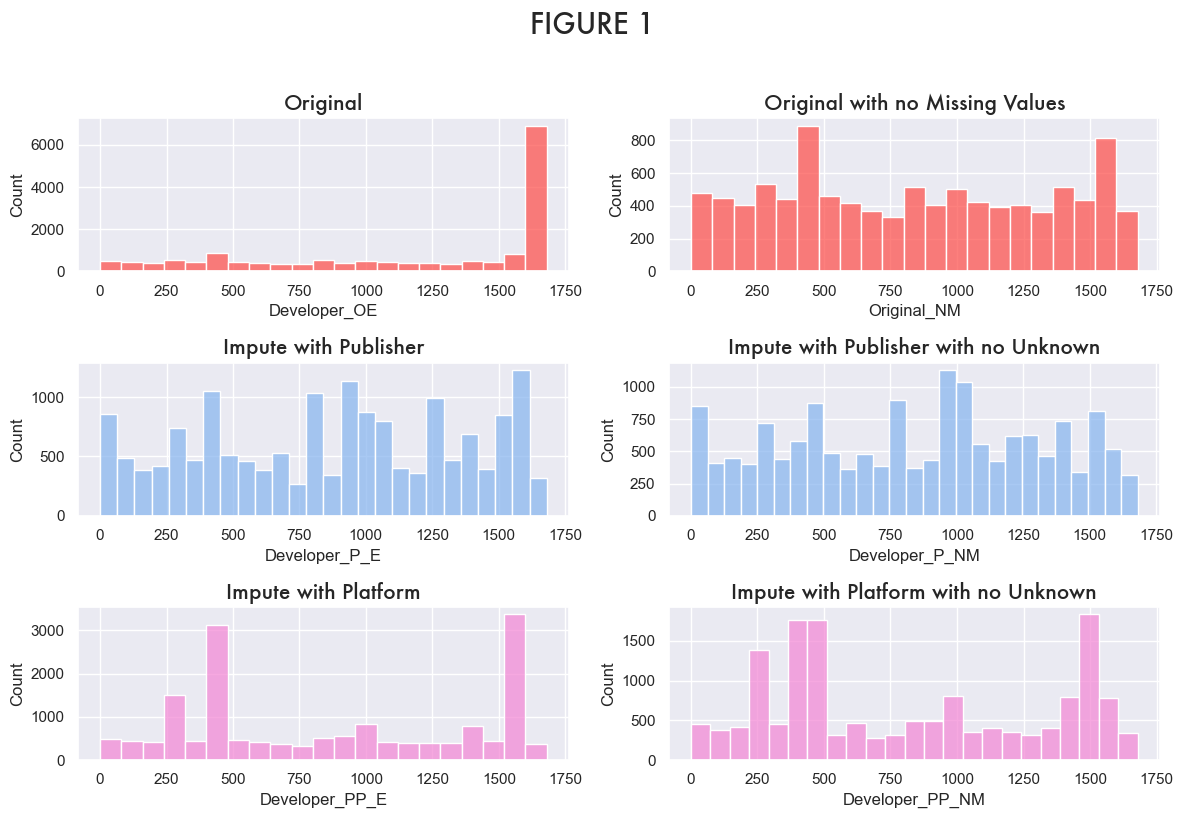

In [35]:
fig, axes = plt.subplots(3, 2, figsize = (12, 8))


sns.histplot(data = vg, x = "Developer_OE", ax = axes[0, 0], color = "#FD5551")
axes[0, 0].set_title("Original", font = "Futura", fontsize = 15)

sns.histplot(data = dist1, x = "Original_NM", ax = axes[0, 1], color = "#FD5551")
axes[0, 1].set_title("Original with no Missing Values", font = "Futura", fontsize = 15)


sns.histplot(data = vg, x = "Developer_P_E", ax = axes[1, 0], color = "#8CB8EF")
axes[1, 0].set_title("Impute with Publisher", font = "Futura", fontsize = 15)

sns.histplot(data = dist2, x = "Developer_P_NM", ax = axes[1, 1], color = "#8CB8EF")
axes[1, 1].set_title("Impute with Publisher with no Unknown", font = "Futura", fontsize = 15)


sns.histplot(data = vg, x = "Developer_PP_E", ax = axes[2, 0], color = "#F38BD6")
axes[2, 0].set_title("Impute with Platform", font = "Futura", fontsize = 15)

sns.histplot(data = dist3, x = "Developer_PP_NM", ax = axes[2, 1], color = "#F38BD6")
axes[2, 1].set_title("Impute with Platform with no Unknown", font = "Futura", fontsize = 15)


#plt.yticks(font = "Futura", fontsize = 12)
#plt.xticks(font = "Futura", fontsize = 12)

fig.suptitle("FIGURE 1", y = 1.02, font = "Futura", fontsize = 20)

plt.tight_layout()

### Figure 2

In Figure 2 the comparison between the combined methods. The second one, with "Platform" first and "Publisher" second has a distribution closer to the original dataset.

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

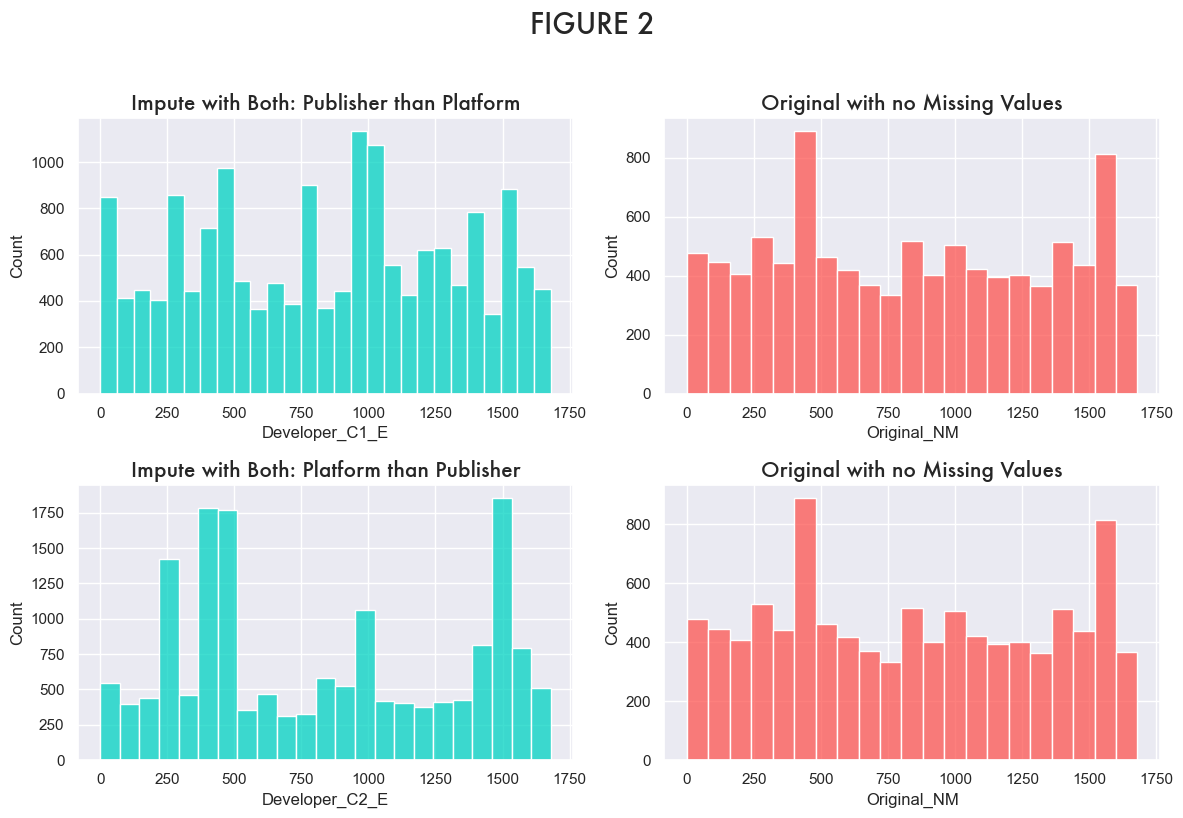

In [36]:
fig, axes = plt.subplots(2, 2, figsize = (12, 8))


sns.histplot(data = vg, x = "Developer_C1_E", ax = axes[0, 0], color = "#00D3C2")
axes[0, 0].set_title("Impute with Both: Publisher than Platform", font = "Futura", fontsize = 15)

sns.histplot(data = dist1, x = "Original_NM", ax = axes[0, 1], color = "#FD5551")
axes[0, 1].set_title("Original with no Missing Values", font = "Futura", fontsize = 15)

sns.histplot(data = vg, x = "Developer_C2_E", ax = axes[1, 0], color = "#00D3C2")
axes[1, 0].set_title("Impute with Both: Platform than Publisher", font = "Futura", fontsize = 15)

sns.histplot(data = dist1, x = "Original_NM", ax = axes[1, 1], color = "#FD5551")
axes[1, 1].set_title("Original with no Missing Values", font = "Futura", fontsize = 15)

#plt.yticks(font = "Futura", fontsize = 12)
#plt.xticks(font = "Futura", fontsize = 12)

fig.suptitle("FIGURE 2", y = 1.02, font = "Futura", fontsize = 20)

plt.tight_layout()

### Figure 3

The purpose of the previous experiments was to avoid the outcome shown in Figure 3. Imputing the mode in a feature with almost 40% of missing values significantly changes the distribution, leading to biased results. 

In [37]:
vg["Developer"].mode()

0    Ubisoft
Name: Developer, dtype: object

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


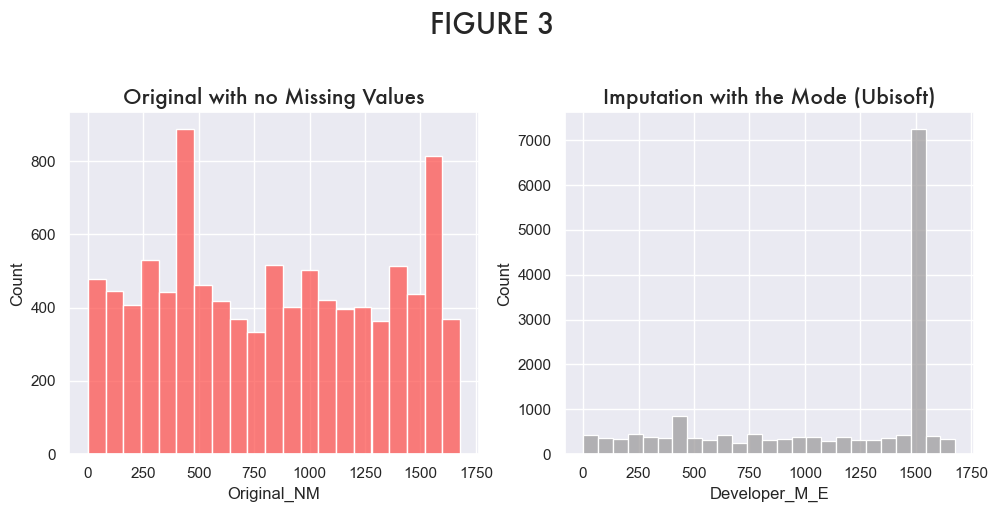

In [38]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))


sns.histplot(data = dist1, x = "Original_NM", ax = axes[0], color = "#FD5551")
axes[0].set_title("Original with no Missing Values", font = "Futura", fontsize = 15)

sns.histplot(data = vg, x = "Developer_M_E", ax = axes[1], color = "#9F9D9E")
axes[1].set_title("Imputation with the Mode (Ubisoft)", font = "Futura", fontsize = 15)



#plt.yticks(font = "Futura", fontsize = 12)
#plt.xticks(font = "Futura", fontsize = 12)

fig.suptitle("FIGURE 3", y = 1.02, font = "Futura", fontsize = 20)

plt.tight_layout()

## Part 1: (Column Names are denoted by quotation marks)  [0-40]

What are the top 5 games by global sales?  

Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  

What is the distribution of the most popular 4 game genres?  

Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  

What are the 3 most common “developer” in the dataset? 

## 1) What are the top 5 games by global sales?

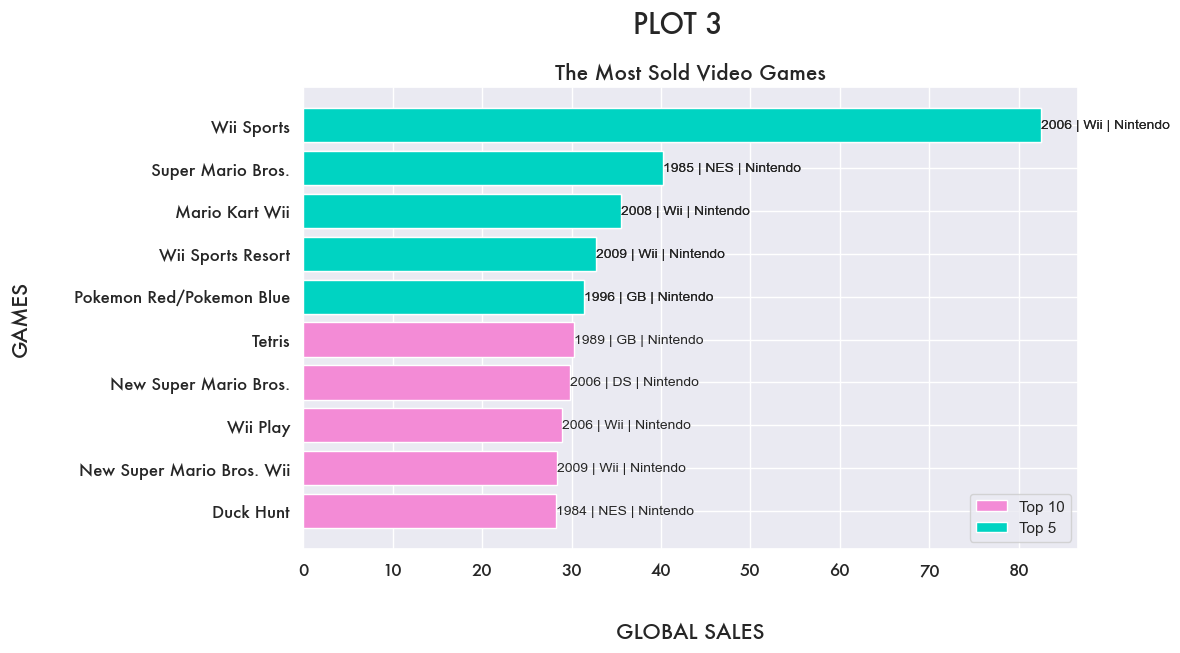

In [39]:
plt.figure(figsize = (10, 6))

top_10 = vg.sort_values(by = "Global_Sales", ascending = False).head(10)
top_5 = vg.sort_values(by = "Global_Sales", ascending = False).head(5)

plt.barh(top_10["Name"], top_10["Global_Sales"], color = "#F38BD6", label = "Top 10")
plt.barh(top_5["Name"], top_5["Global_Sales"], color = "#00D3C2", label = "Top 5")

plt.xlabel("GLOBAL SALES", labelpad = 30, fontname = "Futura", fontsize = 15)
plt.xticks(fontname = "Futura", fontsize = 12)
plt.ylabel("GAMES", labelpad = 30, fontname = "Futura", fontsize = 15)
plt.yticks(fontname = "Futura", fontsize = 12)
plt.title("The Most Sold Video Games", fontname = "Futura", y = 1, fontsize = 15)
plt.suptitle("PLOT 3", fontname = "Futura", y = 1.01, fontsize = 20)
plt.legend()

for index, row in top_10.iterrows():
    plt.text(row["Global_Sales"], index, f"{row['Year_of_Release']} | {row['Platform']} | {row['Publisher']}",
             fontsize = 10, va = "center", ha = "left")

for index, row in top_5.iterrows():
    plt.text(row["Global_Sales"], index, f"{row['Year_of_Release']} | {row['Platform']} | {row['Publisher']}",
             fontsize = 10, va = "center", ha = "left")

plt.gca().invert_yaxis()
plt.show()

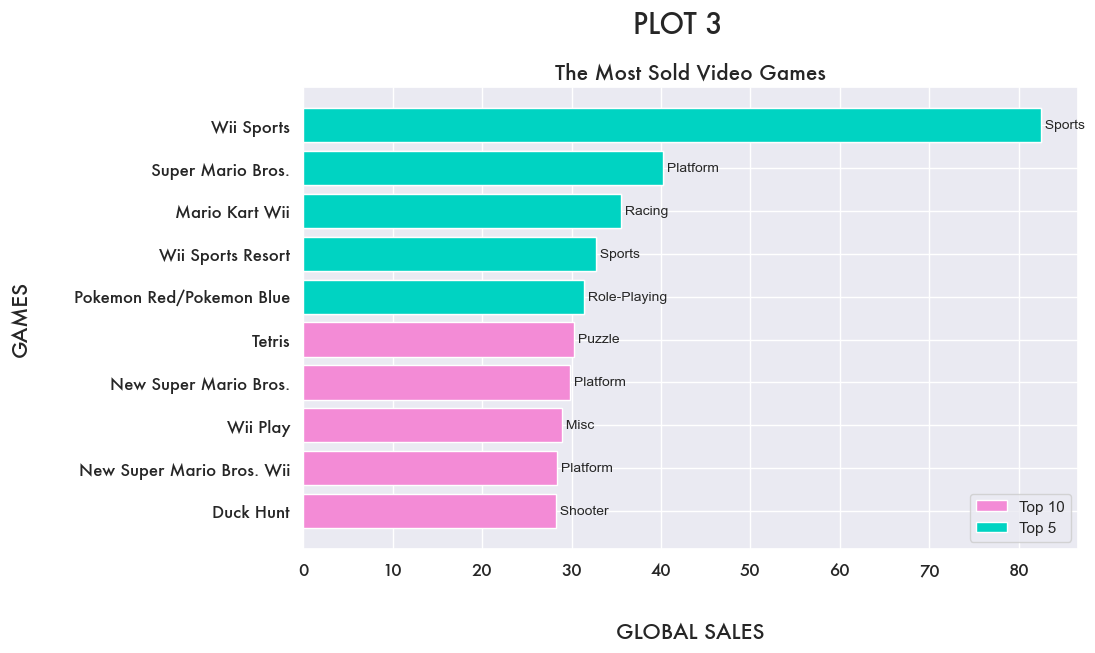

In [40]:
plt.figure(figsize = (10, 6))

top_10 = vg.sort_values(by = "Global_Sales", ascending = False).head(10)
top_5 = vg.sort_values(by = "Global_Sales", ascending = False).head(5)

plt.barh(top_10["Name"], top_10["Global_Sales"], color = "#F38BD6", label = "Top 10")
plt.barh(top_5["Name"], top_5["Global_Sales"], color = "#00D3C2", label = "Top 5")

plt.xlabel("GLOBAL SALES", labelpad = 30, fontname = "Futura", fontsize = 15)
plt.xticks(fontname = "Futura", fontsize = 12)
plt.ylabel("GAMES", labelpad = 30, fontname = "Futura", fontsize = 15)
plt.yticks(fontname = "Futura", fontsize = 12)
plt.title("The Most Sold Video Games", fontname = "Futura", y = 1, fontsize = 15)
plt.suptitle("PLOT 3", fontname = "Futura", y = 1.01, fontsize = 20)
plt.legend()

for index, row in top_10.iterrows():
    plt.text(row["Global_Sales"], index, f" {row['Genre']}",
             fontsize = 10, va = "center", ha = "left")

#for index, row in top_5.iterrows():
  #  plt.text(row["Global_Sales"], index, f"{row['Year_of_Release']} | {row['Platform']} | {row['Publisher']}",
     #        fontsize = 10, va = "center", ha = "left")

plt.gca().invert_yaxis()
plt.show()

This section analyses the Top 5 Games by Global Sales. 

The top-selling game globally has more than double (80) the sales of each of the remaining Top 5 games, which range roughly between 30 and 40 each. However, the difference is less significant when considering the range from the third to the tenth positions.

The analysis becomes interesting when additional information is added to the plots:

- Year of Release: among the Top 05, 03 games are from the first decade of the millennium, one from the 80s and one from the 90s. The tendency is consistent on the Top 10, indicating a "Golden Decade" of the industry according to this dataset.

- Platform: the platforms are related to the decades marking the technological changes over time. For instance, the Nintendo Entertainment System (NES) was launched in 1983 in Japan and in 1985 in the USA (Cunningham, 2021). The Game Boy (GB) was released in 1989 (Swanson, 2023), and the Wii was launched in 2006 (Svensson, 2006).

- Publisher: according to this dataset, Nintendo is the most predominant publisher in the industry, leading not only the top 5 but also the top 10. Throughout its history, the company has been marked by technology innovation and iconic video games launches (MacDonald, 2023).

The bars on the vertical make it easier to read all necessary information: Game Names, Year of Release, Platform and Publisher. I want to investigate more than the question asks to chek any patterns. Both colors were chosen based on the PlayStation 1 controller and they serve the purpose to highlight the answer for the question made and my own investigation.



#FD5551 RED
#8CB8EF BLUE
#F38BD6 PINK
#00D3C2 GREEN
#9F9D9E GRAY

, font = "Futura", fontsize = 15

['#FD5551', '#8CB8EF', '#F38BD6', '#00D3C2', '#9F9D9E']

## 2) Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014? 

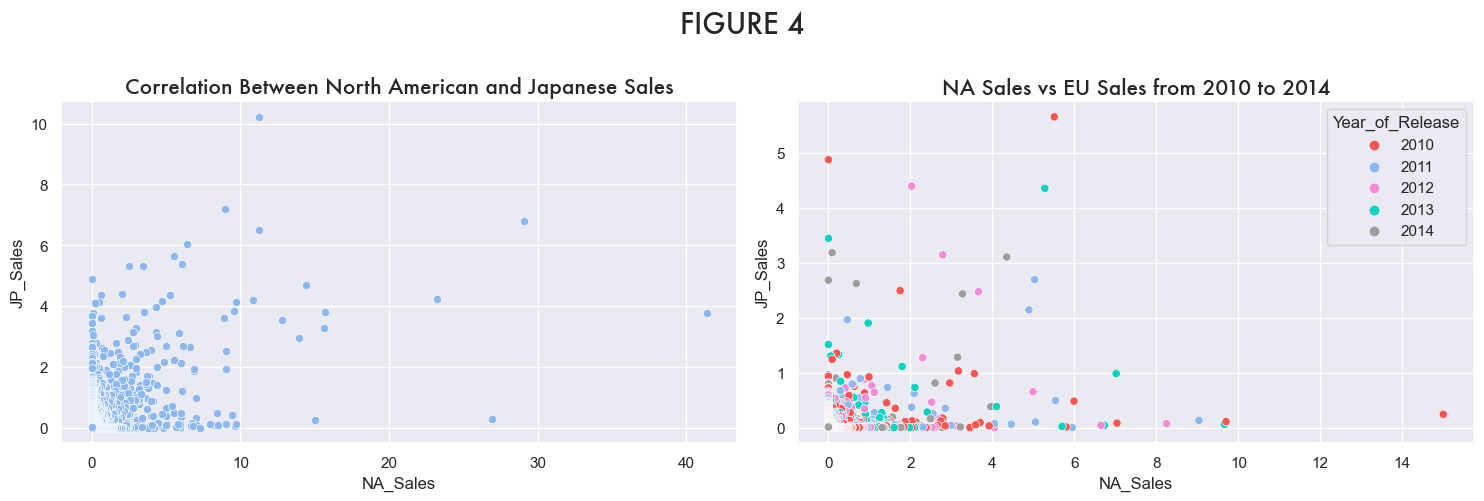

In [41]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

sns.scatterplot(data = vg, x = "NA_Sales", y = "JP_Sales", color = "#8CB8EF", ax = axes[0])
               #hue = "Year_of_Release", 
axes[0].set_title("Correlation Between North American and Japanese Sales", font = "Futura", fontsize = 15)


#vg_1014 = vg[(vg['Year_of_Release'] >= 2010) & (vg['Year_of_Release'] <= 2014)]
sns.scatterplot(data = vg[(vg['Year_of_Release'] >= 2010) & (vg['Year_of_Release'] <= 2014)], 
                x = "NA_Sales", y = "JP_Sales", ax = axes[1],
               hue = "Year_of_Release", palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"])
                
axes[1].set_title("NA Sales vs EU Sales from 2010 to 2014", font = "Futura", fontsize = 15)

fig.suptitle("FIGURE 4", fontname = "Futura", y = 1, fontsize = 20)

plt.tight_layout()
plt.show()

In Figure 4 is displayed two graphics with the correlation between North American and Japanese Sales. In the second one the information is filtered for the years 2010 through 2014. 


Both plots show a positive but timid correlation between the two features which is supported by the two performed tests and their respective coefficients: Pearson (0.451166) and Spearman (-0.228913).

Further investigation (Figure 5 and tests) suggests that the North American and European markets are more correlated than the Japanese. The coefficients for NA and EU Sales are 0.766548 (Pearson) and 0.68103 (Spearman), while JP and EU are very similar to JP and NA (0.435902 for Pearson and -0.175105 for Spearman).

The Pearson (Laerd Statistics, 2020) and The Spearman (Barcelona Field Studies Centre, 2023) Correlation Coefficient measure the strength and direction between two variables and help to understand their relationship.
While the first one is primarily used for linear associations, the second one considers multiple mathematical forms of association. Both coefficients range from -1 to 1, where negative values indicate a strong negative relationship and the opposite occurs with values close to 1. The main difference here is their calculation methods: the Spearman bases its coefficient on the ranks of the data, which makes it less susceptible to the influence of outliers, whereas the Pearson uses the actual values to calculate its coefficient.


In [42]:
pearson_corr = vg[["NA_Sales", "JP_Sales"]].corr(method = "pearson")

spearman_corr = vg[["NA_Sales", "JP_Sales"]].corr(method = "spearman")

print("Pearson correlation coefficient:")
print(pearson_corr)
print("\nSpearman correlation coefficient:")
print(spearman_corr)

Pearson correlation coefficient:
          NA_Sales  JP_Sales
NA_Sales  1.000000  0.451091
JP_Sales  0.451091  1.000000

Spearman correlation coefficient:
          NA_Sales  JP_Sales
NA_Sales  1.000000 -0.229028
JP_Sales -0.229028  1.000000


#### Exploring other possible correlations

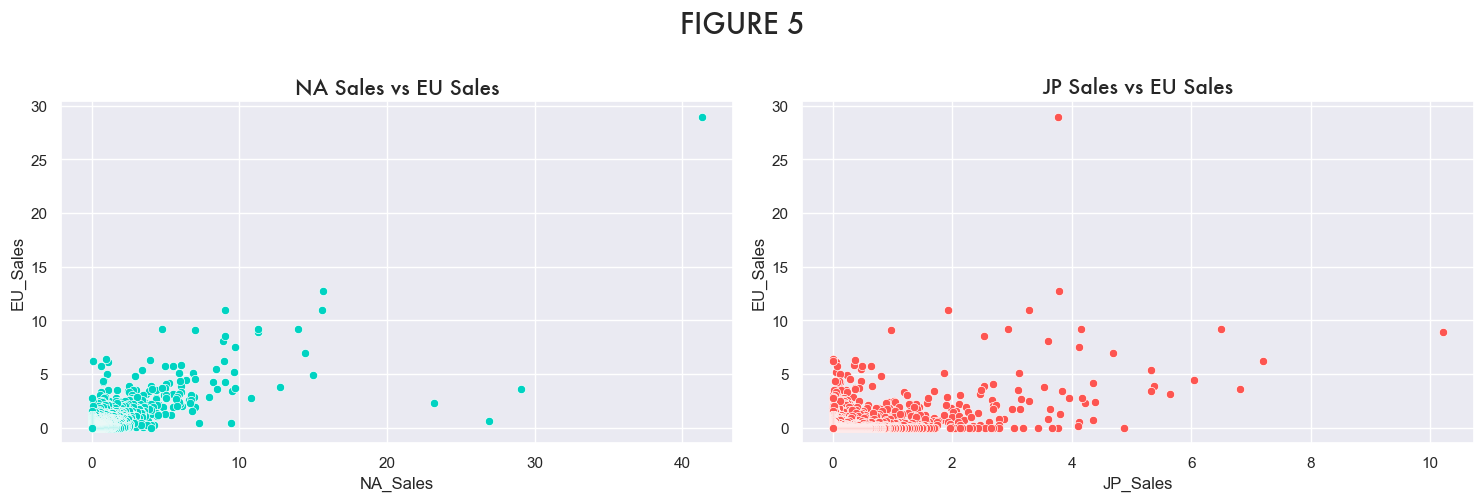

In [43]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

sns.scatterplot(data = vg, x = "NA_Sales", y = "EU_Sales", ax = axes[0], color = "#00D3C2")
axes[0].set_title("NA Sales vs EU Sales", font = "Futura", fontsize = 15)
 

sns.scatterplot(data = vg, x = "JP_Sales", y = "EU_Sales", ax = axes[1], color = "#FD5551")
axes[1].set_title("JP Sales vs EU Sales", font = "Futura", fontsize = 15)

fig.suptitle("FIGURE 5", fontname = "Futura", y = 1, fontsize = 20)
  
plt.tight_layout()
plt.show()

In [44]:
pearson_corr = vg[["NA_Sales", "EU_Sales"]].corr(method = "pearson")

spearman_corr = vg[["NA_Sales", "EU_Sales"]].corr(method = "spearman")

print("Pearson correlation coefficient:")
print(pearson_corr)
print("\nSpearman correlation coefficient:")
print(spearman_corr)

Pearson correlation coefficient:
          NA_Sales  EU_Sales
NA_Sales  1.000000  0.766541
EU_Sales  0.766541  1.000000

Spearman correlation coefficient:
          NA_Sales  EU_Sales
NA_Sales  1.000000  0.681109
EU_Sales  0.681109  1.000000


In [45]:
pearson_corr = vg[["EU_Sales", "JP_Sales"]].corr(method = "pearson")

spearman_corr = vg[["EU_Sales", "JP_Sales"]].corr(method = "spearman")

print("Pearson correlation coefficient:")
print(pearson_corr)
print("\nSpearman correlation coefficient:")
print(spearman_corr)

Pearson correlation coefficient:
          EU_Sales  JP_Sales
EU_Sales  1.000000  0.435883
JP_Sales  0.435883  1.000000

Spearman correlation coefficient:
          EU_Sales  JP_Sales
EU_Sales  1.000000 -0.175211
JP_Sales -0.175211  1.000000


## 3) What is the distribution of the most popular 4 game genres? 

Among all twelve genres considered in this dataset, action is the most popular and represents almost double of the third (Misc) and fourth (Role-Playing) place. 

Plot 4 and 5, show the distribution of all genres in value counts and percentages respectively, while Plot 6 highlights the four most popular genres of games. A bar chart (Plot 5 and 6) is the recommended visual plot for categorical data (Wheelan, 2013) for its simplicity in clearing showing the information, making it easy to compare the different displayed categories. The histogram in Plot 4 helps to understand what kind of distribution it is been dealt with. In this case it shows that the distribution is not normal, which would impact in future decisions if the investigation would be more complex. 

In [46]:
vg.dropna(subset = ["Genre"], inplace = True)

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


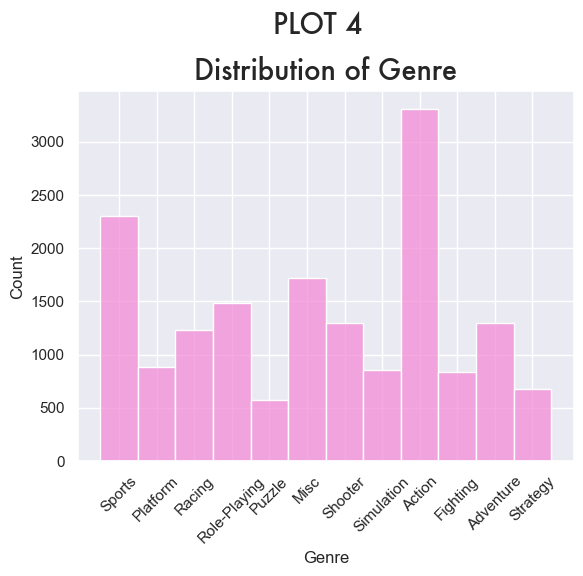

In [47]:
sns.histplot(vg["Genre"], color = "#F38BD6")
plt.suptitle("PLOT 4", fontname = "Futura", y = 1.05, fontsize = 20)
plt.title("Distribution of Genre", fontname = "Futura", y = 1.01, fontsize = 20)
plt.xticks(rotation = 45);

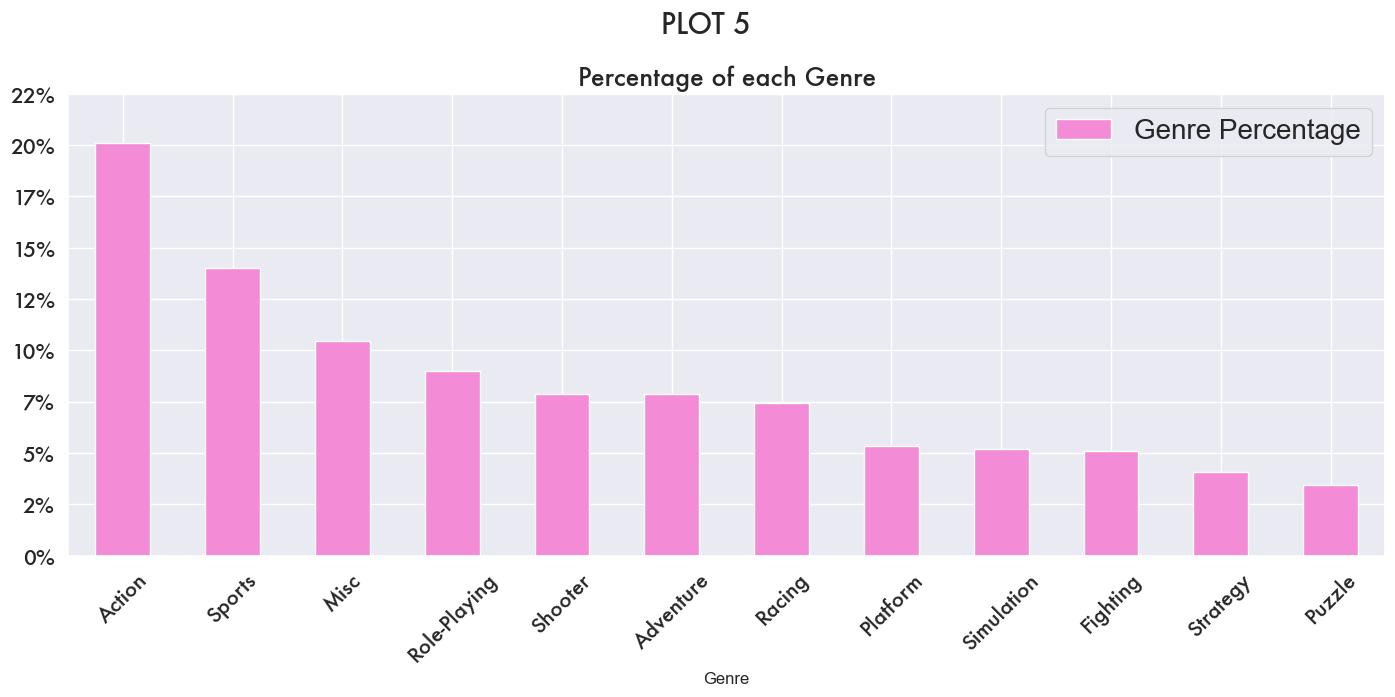

In [48]:
gen = vg["Genre"].value_counts()

gp = pd.DataFrame((gen / (len(vg["Genre"]))) * 100)

gp.columns = ["Genre Percentage"]

gp.plot(kind = "bar", color = "#F38BD6", figsize = (17,6))

plt.title("Percentage of each Genre", font = "Futura", fontsize = 18, y = 1)
plt.suptitle("PLOT 5", font = "Futura", fontsize = 20, y = 1.02)

plt.yticks(ticks = plt.yticks()[0], labels=[f"{int(tick)}%" for tick in plt.yticks()[0]])
plt.xticks(rotation = 45, font = "Futura", fontsize = 15)
plt.yticks(font = "Futura", fontsize = 15)
plt.legend(fontsize = 20)

plt.show()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x900 with 0 Axes>

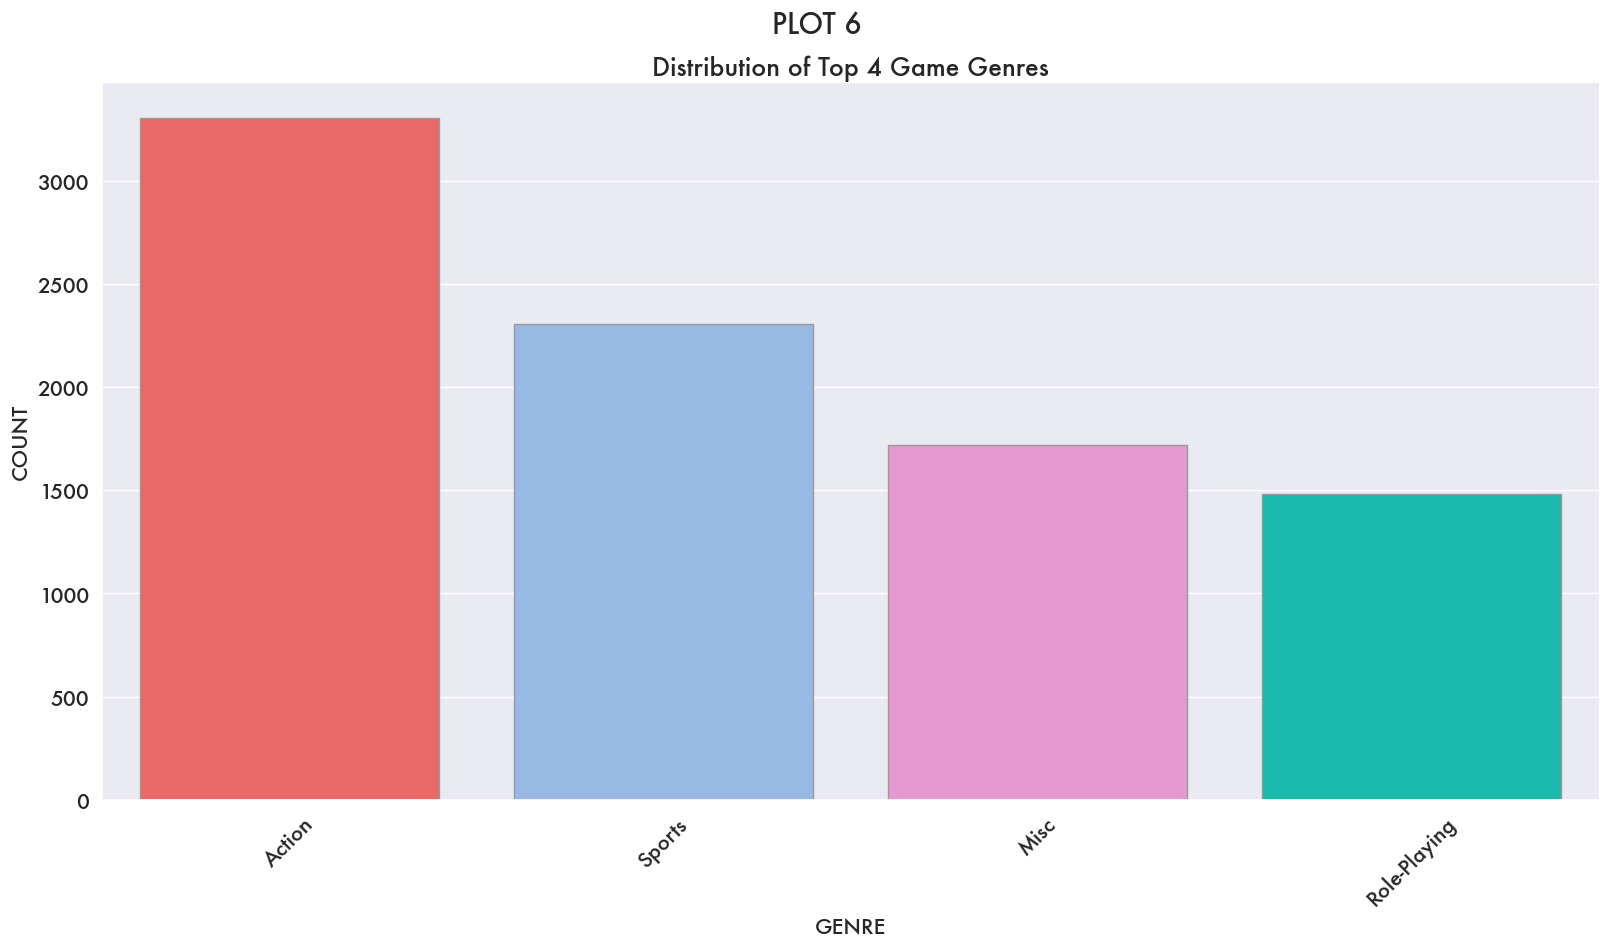

In [49]:
plt.figure(figsize = (18, 9))

sns.catplot(data = vg[vg["Genre"].isin(vg["Genre"].value_counts().head(4).index)], 
             x = "Genre", kind = "count", edgecolor = "0.6", height = 8, aspect = 2,
            palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"],
           order = vg["Genre"].value_counts().head(4).index)

plt.suptitle("PLOT 6", font = "Futura", fontsize = 20, y = 1.07)
plt.title("Distribution of Top 4 Game Genres", font = "Futura", fontsize = 18, y = 1)
plt.xlabel("GENRE", font = "Futura", fontsize = 15)
plt.ylabel("COUNT", font = "Futura", fontsize = 15)
plt.xticks(rotation = 45) 


plt.yticks(font = "Futura", fontsize = 15)
plt.xticks(rotation = 45, font = "Futura", fontsize = 15)
plt.show()

## 4) Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  

Two graphics will help to answer the question:

1) In Plot 7 the top of each bar represents the mean of European Sales for each year and the black line is the interval confidence for each mean. The green line visually separates the data into two periods of time, before 2005 and after, while the red lines helps to compare the means in both groups. 

2) Plot 8 highlights the the mean values over the years and the trend by using a line plot.

The range of the chosen threshold (0.15 - 0.22) in both plots shows that the high values occur more often before the year of 2005 than after this period. The presence of higher peaks in earlier years are followed by higher confidence intervals. The longer black lines or broader confidence intervals, measures the uncertainty about the true mean (Hayes, 2021). In this case, using a confidence interval of 95%, the true means of the European sales are more uncertain for the period before 2005, mostly between 1986 ans 1990. One possible explanation might be the difference between the samples, once the dataset contains more observations for the years after 2005 as shown in Plot 9. For the decade of 1980 the low amount of observations and the presence of outliers might have impacted the width of the interval confidences. 

The same trend is observed for the Global, Japanese and North American Sales, as shown on Plots 10, 11 and 12 respectively.

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

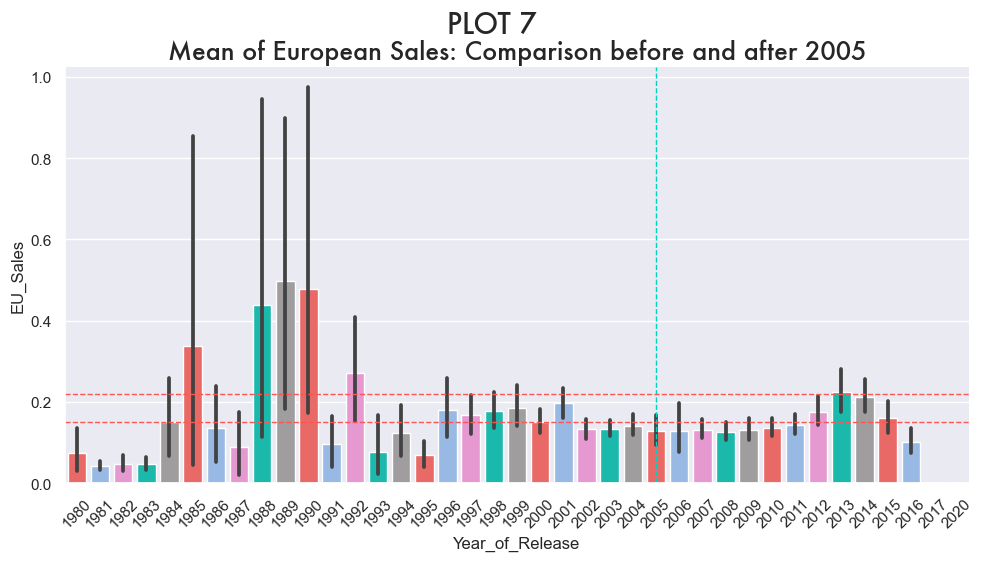

In [50]:
plt.figure(figsize=(20, 10))

sns.catplot(data = vg, x = "Year_of_Release", y = "EU_Sales", 
            kind = "bar", aspect = 2, errorbar=("ci", 95),
           palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"])

plt.axvline(x = 25, linewidth = 1, color = "#00D3C2", linestyle = "--")

plt.axhline(y = 0.22, linewidth = 1, color = "#FD5551", linestyle = "--")
plt.axhline(y = 0.15, linewidth = 1, color = "#FD5551", linestyle = "--")
#plt.axhline(y = 0.3, linewidth = 1, color = "#FD5551", linestyle = "--")

plt.suptitle("PLOT 7", font = "Futura", fontsize = 20, y = 1.08)
plt.title("Mean of European Sales: Comparison before and after 2005", font = "Futura", fontsize = 18, y = 1)

plt.xticks(rotation = 45)

#plt.tight_layout(pad = 0.1)

plt.show()

aspect : scalar
    Aspect ratio of each facet, so that ``aspect * height`` gives the width
    of each facet in inches.    

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_6879/399331725.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = "Year_of_Release", y = "EU_Sales", data = vg,
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


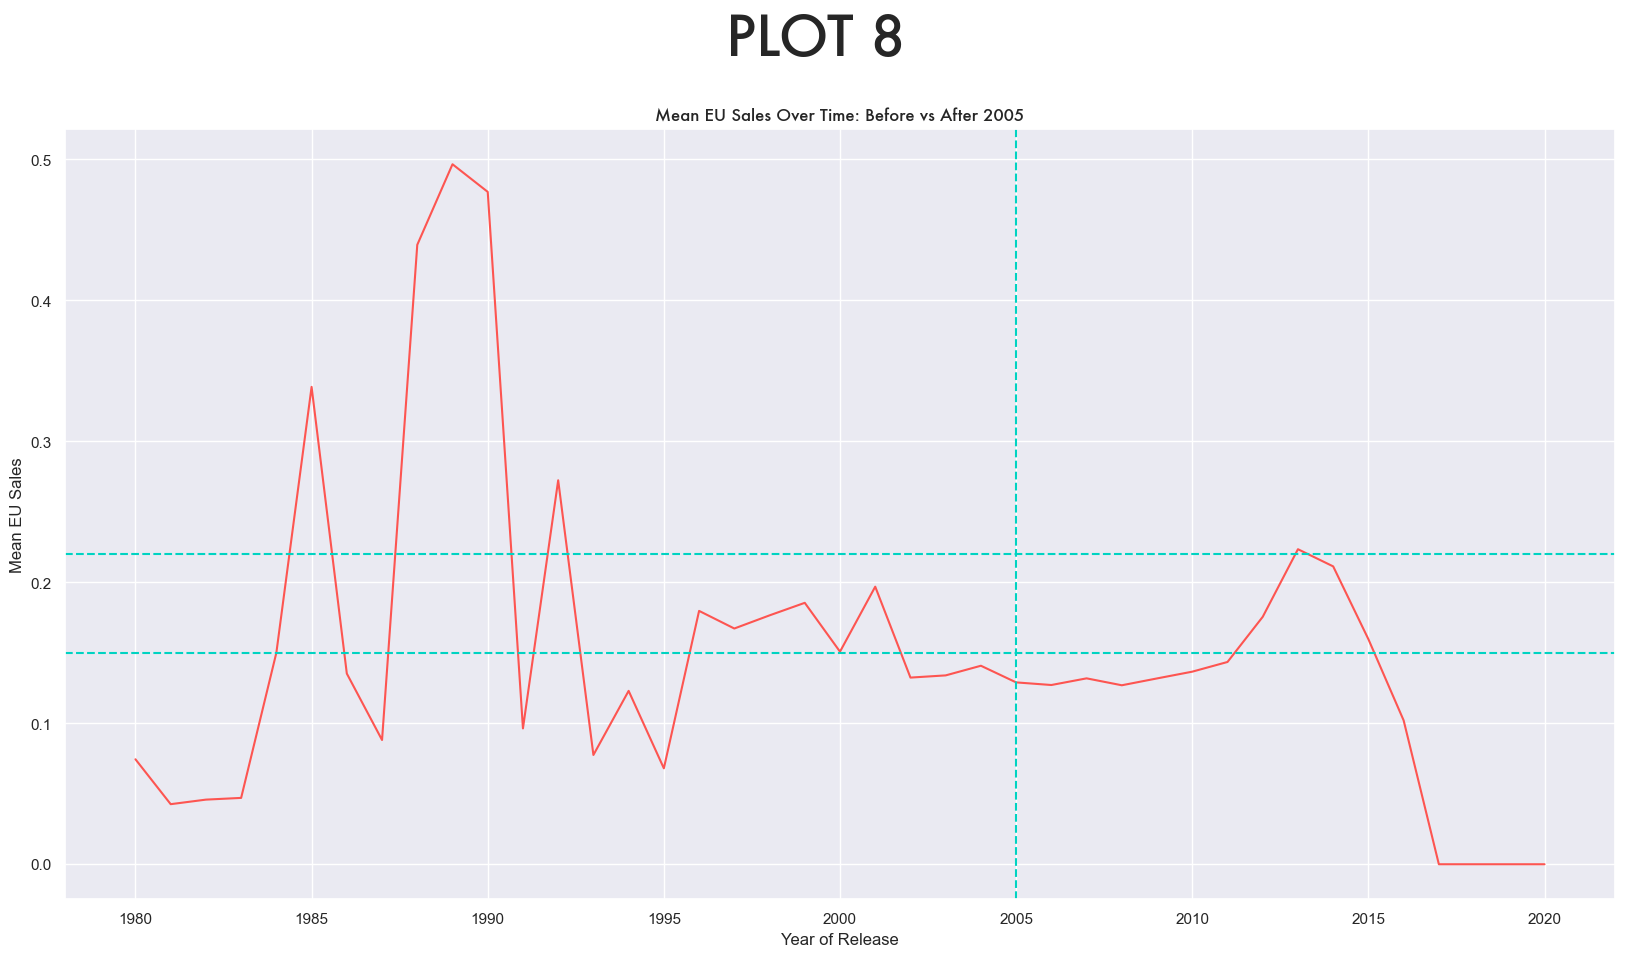

In [51]:
plt.figure(figsize = (20, 10))

sns.lineplot(x = "Year_of_Release", y = "EU_Sales", data = vg, 
             estimator = "mean", ci = None, color = "#FD5551", errorbar = None)

plt.axvline(x = 2005, color = "#00D3C2", linestyle = '--') 
plt.axhline(y = 0.22, color = "#00D3C2", linestyle = '--')
plt.axhline(y = 0.15, color = "#00D3C2", linestyle = '--')

plt.suptitle("PLOT 8", font = "Futura", fontsize = 40, y = 1)
plt.title("Mean of European Sales: Comparison before and after 2005", font = "Futura", fontsize = 40, y = 0.9)

plt.xlabel("Year of Release")
plt.ylabel("Mean EU Sales")
plt.title("Mean EU Sales Over Time: Before vs After 2005")
plt.show()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


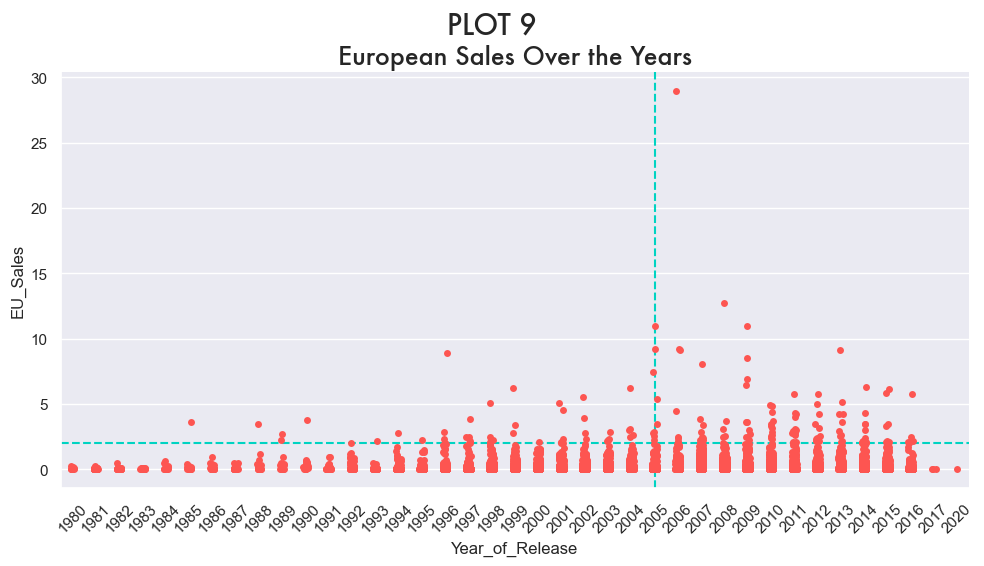

In [52]:
sns.catplot(data = vg, x = "Year_of_Release", y = "EU_Sales",
            color = "#FD5551", aspect = 2)

plt.axvline(x = 25, color = "#00D3C2", linestyle = '--')
plt.axhline(y = 2, color = "#00D3C2", linestyle = '--')

plt.suptitle("PLOT 9", font = "Futura", fontsize = 20, y = 1.09)
plt.title("European Sales Over the Years", font = "Futura", fontsize = 18, y = 1)

plt.xticks(rotation = 45);

### Let us check for the other sales

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

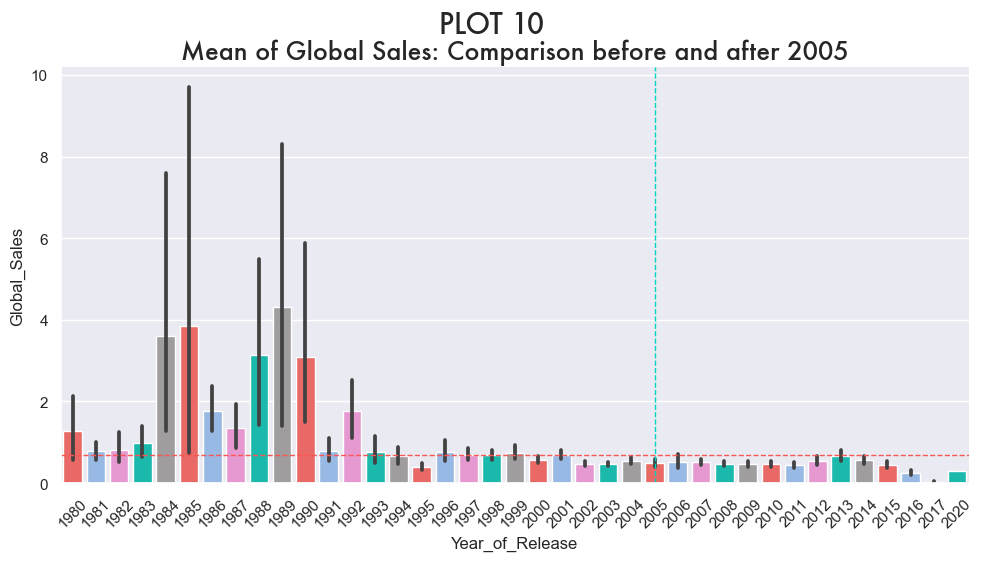

In [63]:
plt.figure(figsize = (20, 10))

sns.catplot(data = vg, x = "Year_of_Release", y = "Global_Sales", 
            kind = "bar", aspect = 2,
           palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"])

plt.axvline(x = 25, linewidth = 1, color = "#00D3C2", linestyle = "--")
plt.axhline(y = 0.7, linewidth = 1, color = "#FD5551", linestyle = "--")

plt.suptitle("PLOT 10", font = "Futura", fontsize = 20, y = 1.08)
plt.title("Mean of Global Sales: Comparison before and after 2005", font = "Futura", fontsize = 18, y = 1)


plt.xticks(rotation = 45)
plt.show()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

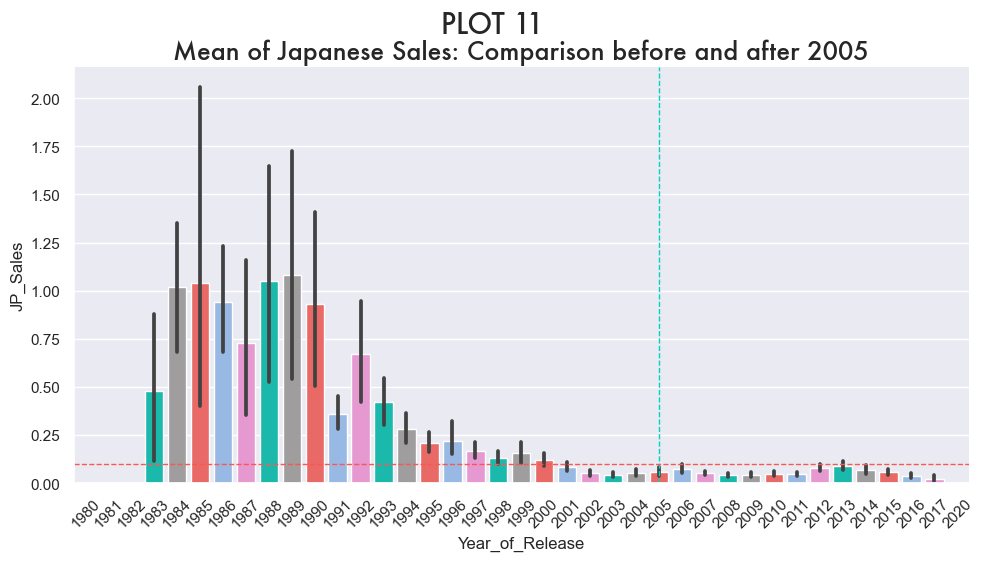

In [64]:
plt.figure(figsize = (20, 10))

sns.catplot(data = vg, x = "Year_of_Release", y = "JP_Sales", 
            kind = "bar", aspect = 2,
           palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"])

plt.axvline(x = 25, linewidth = 1, color = "#00D3C2", linestyle = "--")
plt.axhline(y = 0.1, linewidth = 1, color = "#FD5551", linestyle = "--")

plt.suptitle("PLOT 11", font = "Futura", fontsize = 20, y = 1.08)
plt.title("Mean of Japanese Sales: Comparison before and after 2005", font = "Futura", fontsize = 18, y = 1)

plt.xticks(rotation = 45)
plt.show()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

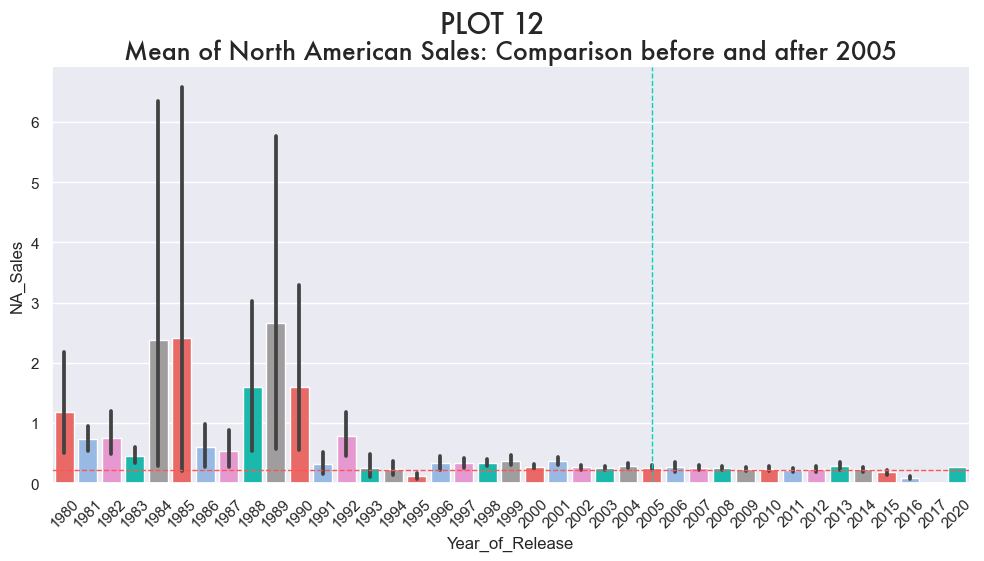

In [65]:
plt.figure(figsize = (20, 10))

sns.catplot(data = vg, x = "Year_of_Release", y = "NA_Sales", 
            kind = "bar", aspect = 2,
           palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"])

plt.axvline(x = 25, linewidth = 1, color = "#00D3C2", linestyle = "--")
plt.axhline(y = 0.22, linewidth = 1, color = "#FD5551", linestyle = "--")

plt.suptitle("PLOT 12", font = "Futura", fontsize = 20, y = 1.08)
plt.title("Mean of North American Sales: Comparison before and after 2005", font = "Futura", fontsize = 18, y = 1)


plt.xticks(rotation = 45)
plt.show()

## 5) What are the 3 most common “developer” in the dataset? 


#FD5551 RED
#8CB8EF BLUE
#F38BD6 PINK
#00D3C2 GREEN
#9F9D9E GRAY

, font = "Futura", fontsize = 15

['#FD5551', '#8CB8EF', '#F38BD6', '#00D3C2', '#9F9D9E']

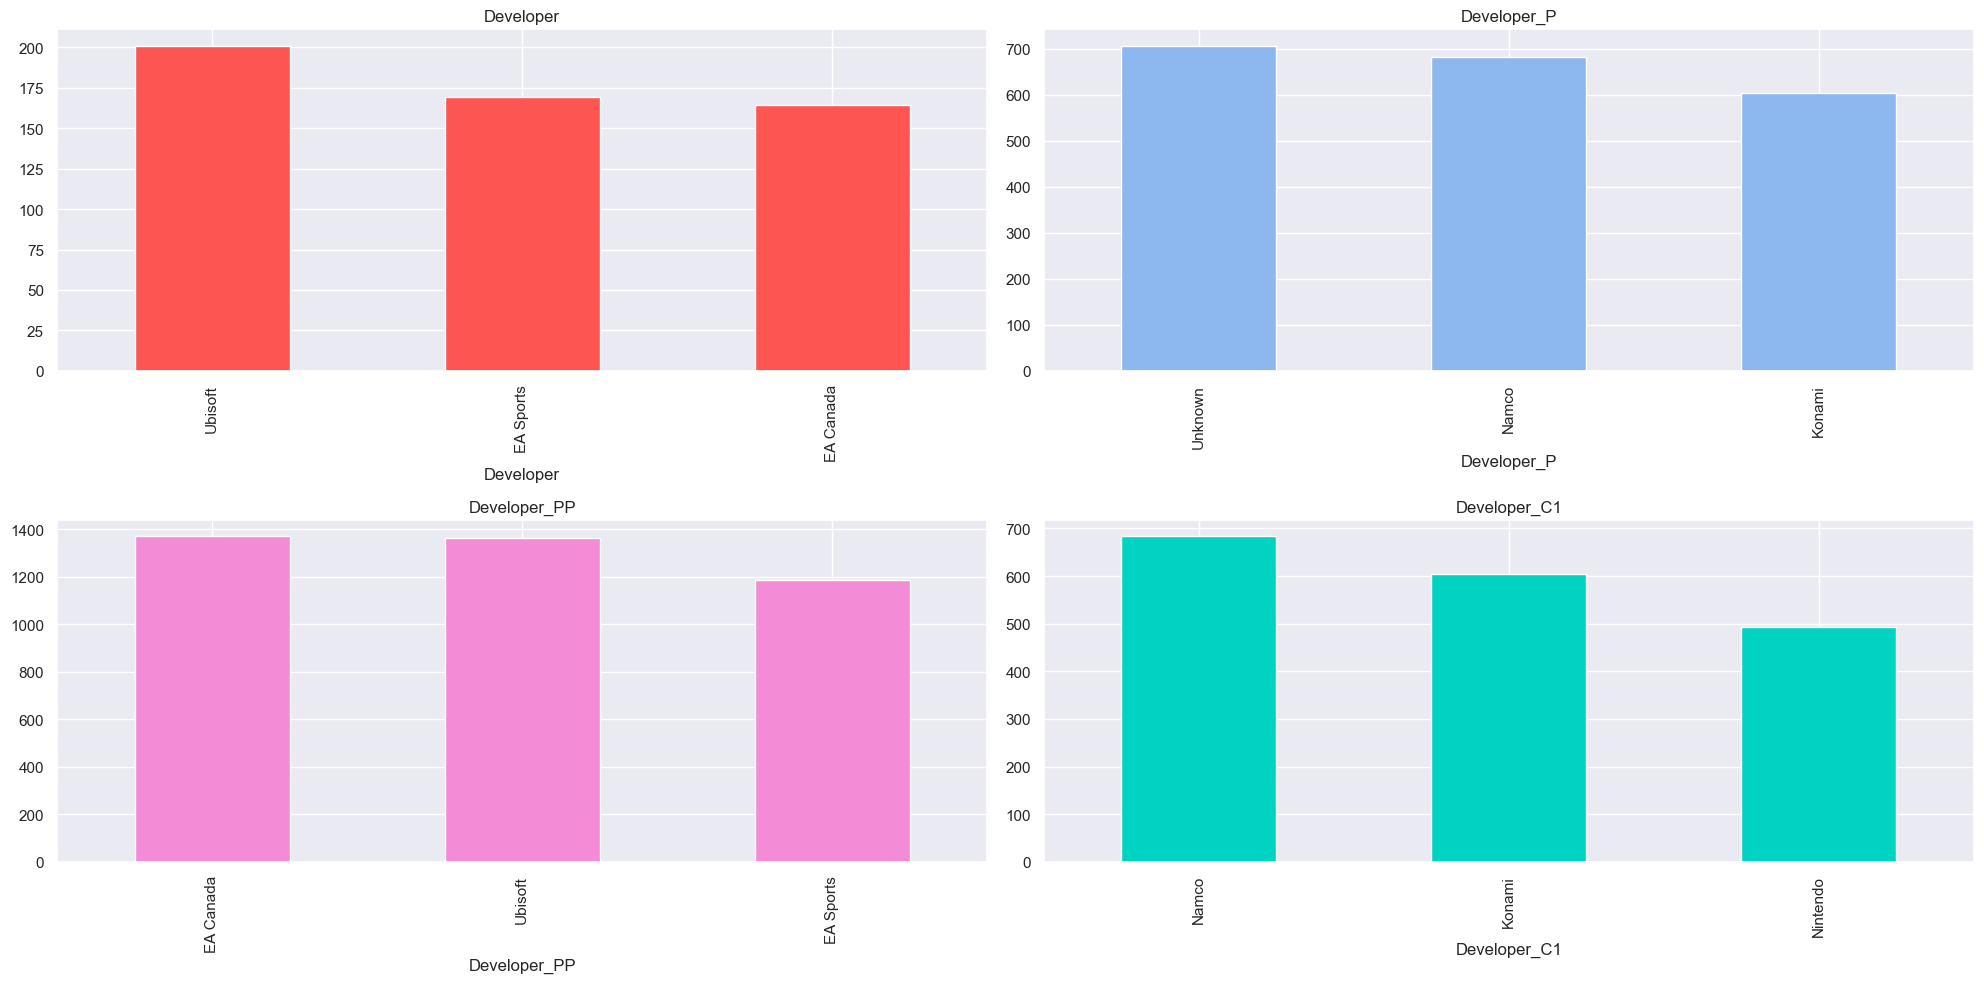

In [67]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Plot the first graphic
vg['Developer'].value_counts().head(3).plot(kind='bar', ax=axes[0, 0], color="#FD5551")
axes[0, 0].set_title('Developer')

# Plot the second graphic
vg['Developer_P'].value_counts().head(3).plot(kind='bar', ax=axes[0, 1], color="#8CB8EF")
axes[0, 1].set_title('Developer_P')

# Plot the third graphic
vg['Developer_PP'].value_counts().head(3).plot(kind='bar', ax=axes[1, 0], color="#F38BD6")
axes[1, 0].set_title('Developer_PP')

# Plot the fourth graphic
vg['Developer_C1'].value_counts().head(3).plot(kind='bar', ax=axes[1, 1], color="#00D3C2")
axes[1, 1].set_title('Developer_C1')

plt.tight_layout()
plt.show()


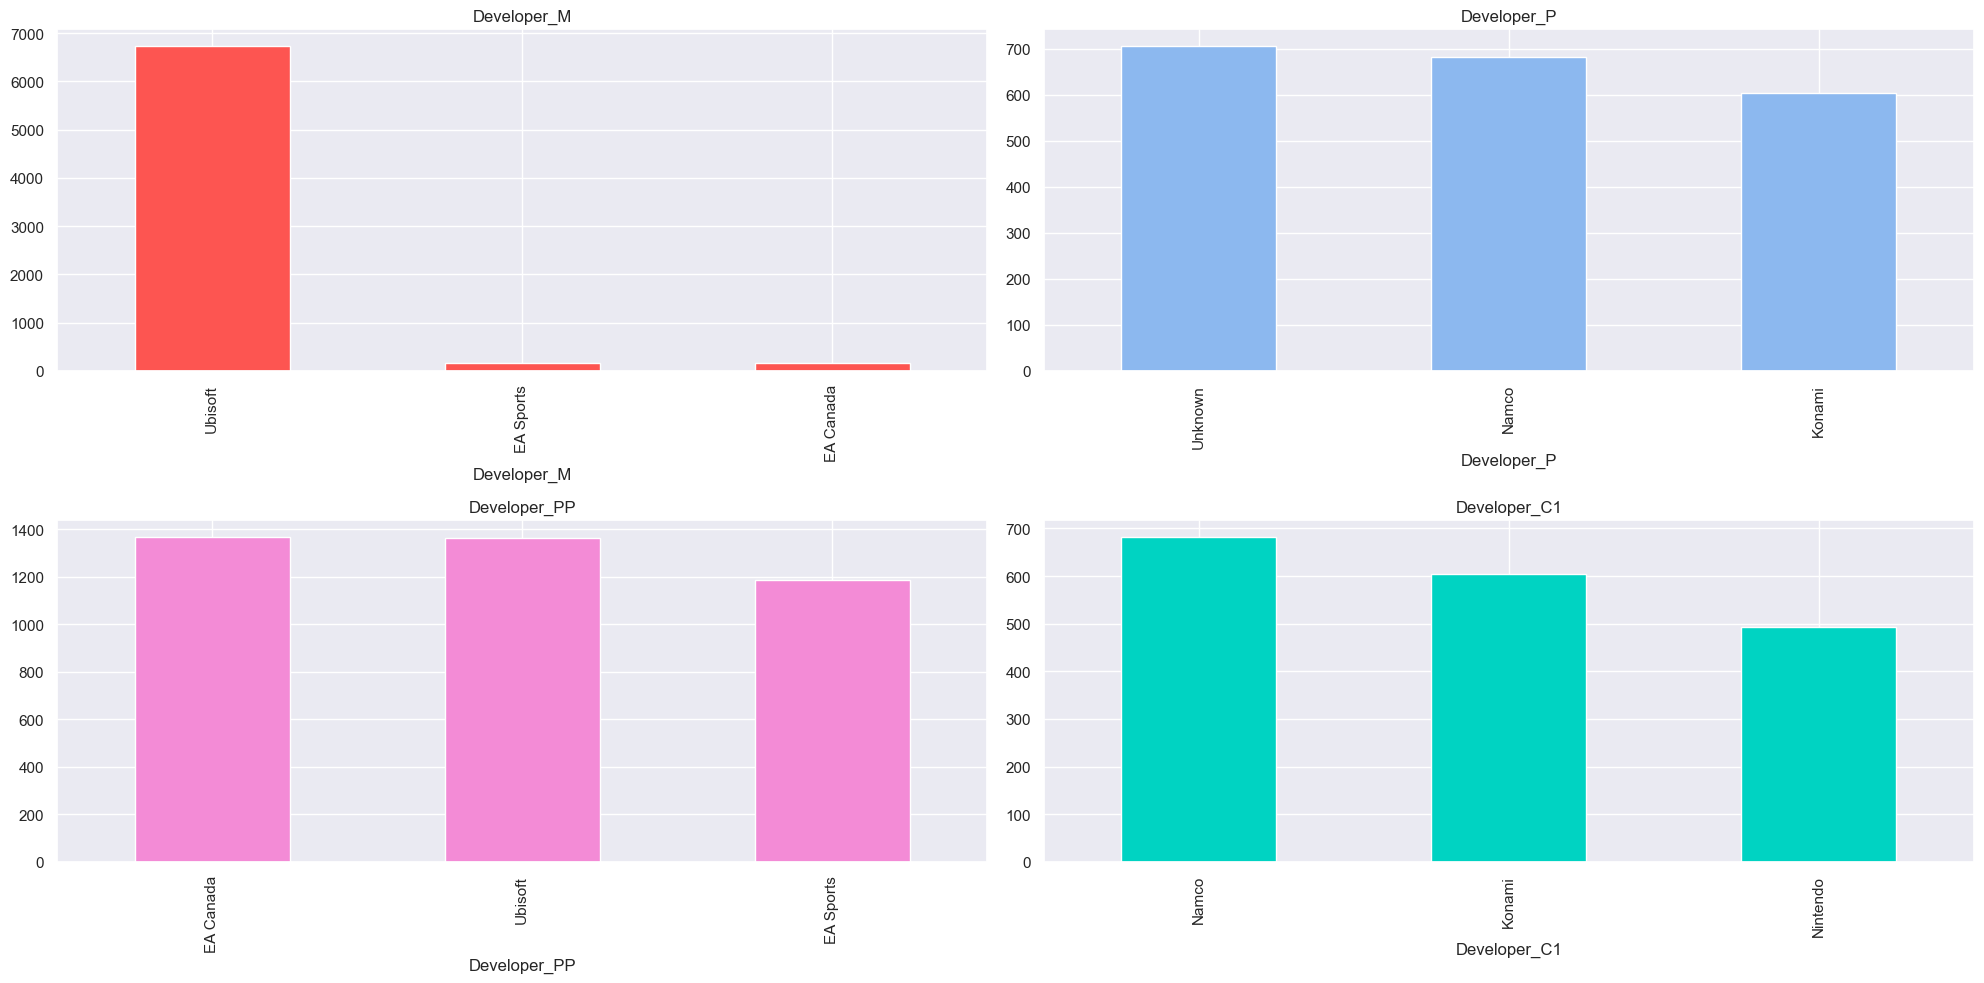

In [69]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Plot the first graphic
vg['Developer_M'].value_counts().head(3).plot(kind='bar', ax=axes[0, 0], color="#FD5551")
axes[0, 0].set_title('Developer_M')

# Plot the second graphic
vg['Developer_P'].value_counts().head(3).plot(kind='bar', ax=axes[0, 1], color="#8CB8EF")
axes[0, 1].set_title('Developer_P')

# Plot the third graphic
vg['Developer_PP'].value_counts().head(3).plot(kind='bar', ax=axes[1, 0], color="#F38BD6")
axes[1, 0].set_title('Developer_PP')

# Plot the fourth graphic
vg['Developer_C1'].value_counts().head(3).plot(kind='bar', ax=axes[1, 1], color="#00D3C2")
axes[1, 1].set_title('Developer_C1')

plt.tight_layout()
plt.show()


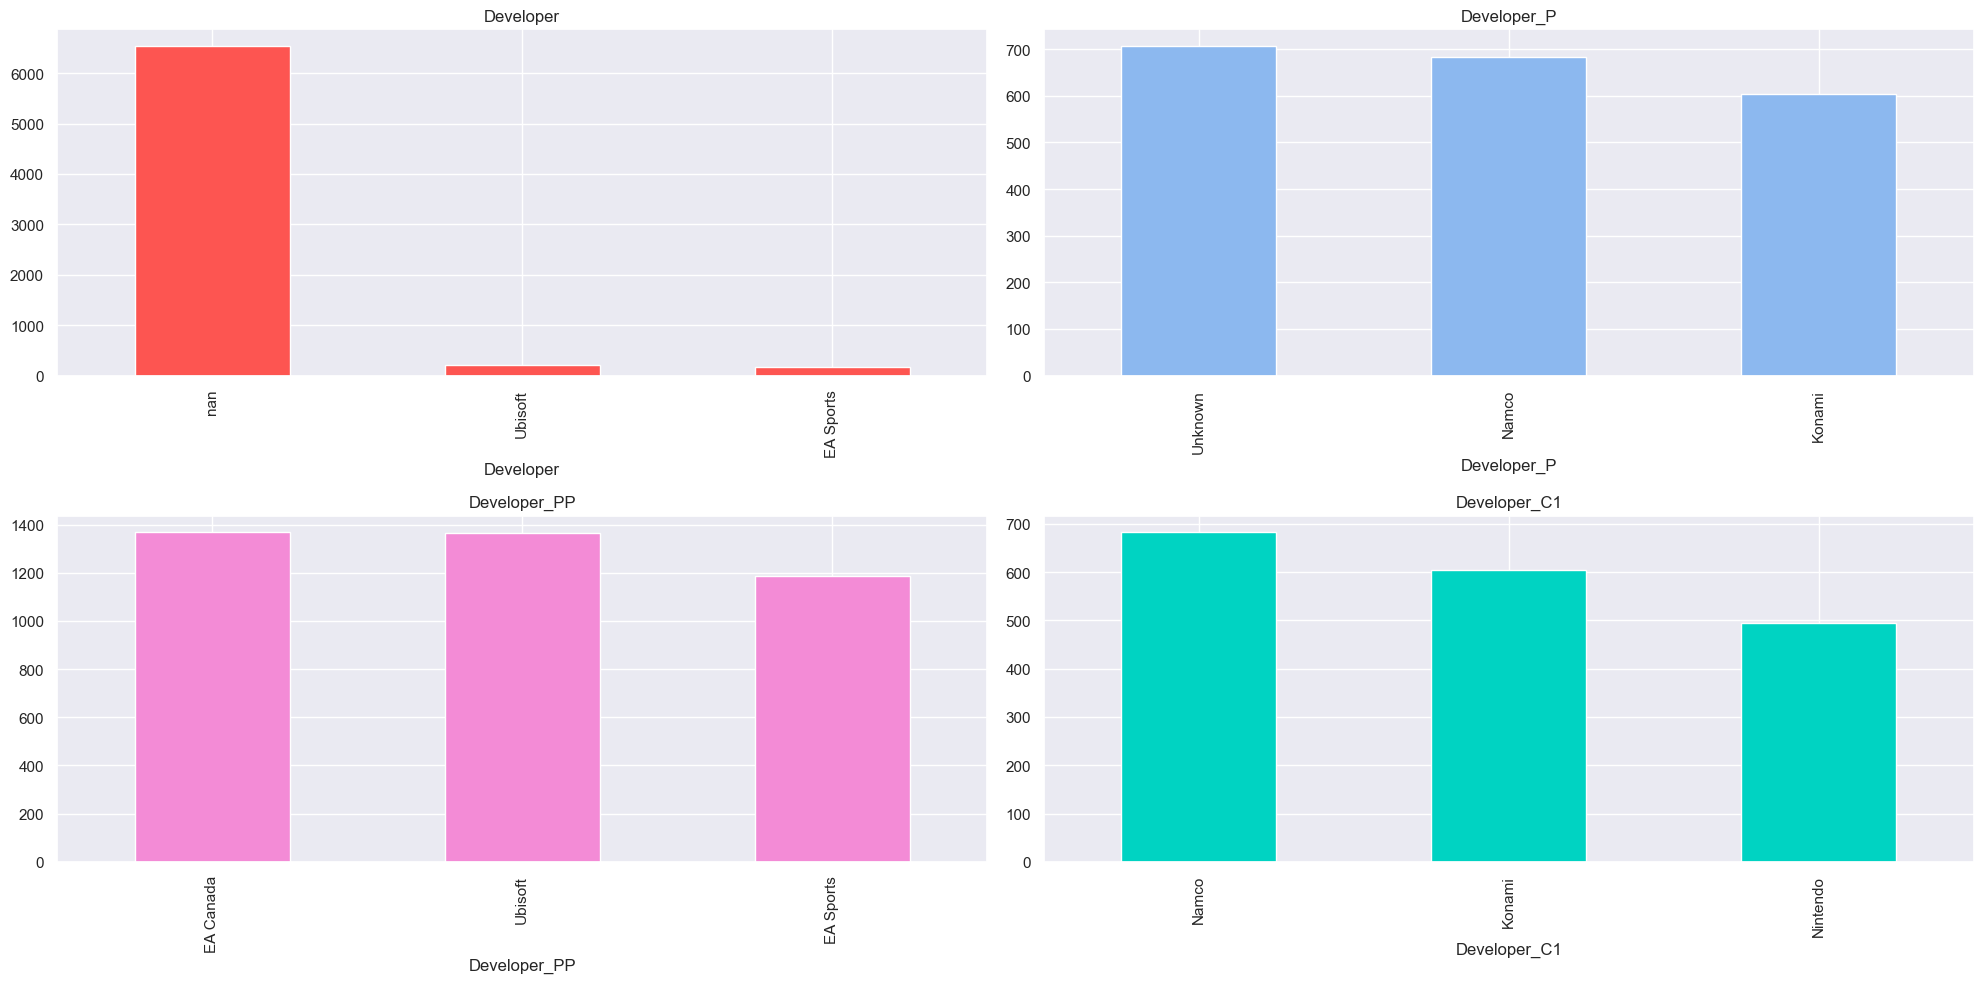

In [70]:
#vg['Developer'].value_counts(dropna=False).head(3).plot(kind='bar', ax=axes[0, 0], color='skyblue')
#axes[0, 0].set_title('Developer')


import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Plot the first graphic
vg['Developer'].value_counts(dropna=False).head(3).plot(kind='bar', ax=axes[0, 0], color= "#FD5551")
axes[0, 0].set_title('Developer')
#vg['Developer'].value_counts().head(3).plot(kind='bar', ax=axes[0, 0], color='skyblue')
#axes[0, 0].set_title('Developer')

# Plot the second graphic
vg['Developer_P'].value_counts().head(3).plot(kind='bar', ax=axes[0, 1], color="#8CB8EF")
axes[0, 1].set_title('Developer_P')

# Plot the third graphic
vg['Developer_PP'].value_counts().head(3).plot(kind='bar', ax=axes[1, 0], color="#F38BD6")
axes[1, 0].set_title('Developer_PP')

# Plot the fourth graphic
vg['Developer_C1'].value_counts().head(3).plot(kind='bar', ax=axes[1, 1], color="#00D3C2")
axes[1, 1].set_title('Developer_C1')

plt.tight_layout()
plt.show()

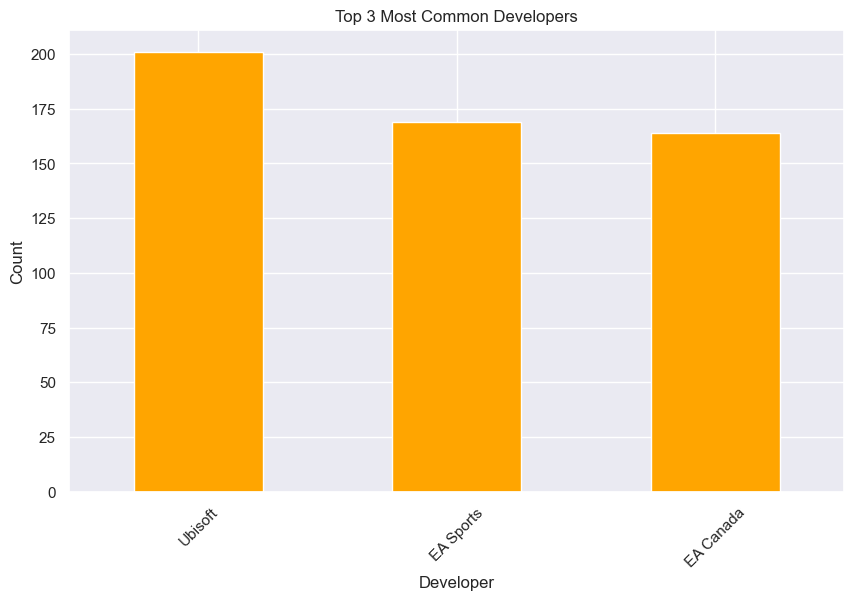

In [71]:
counts = vg['Developer'].value_counts().head(3)

plt.figure(figsize = (10, 6))
counts.plot(kind = "bar", color = "orange")

plt.xlabel('Developer', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Top 3 Most Common Developers')
plt.xticks(rotation = 45)  
plt.show()

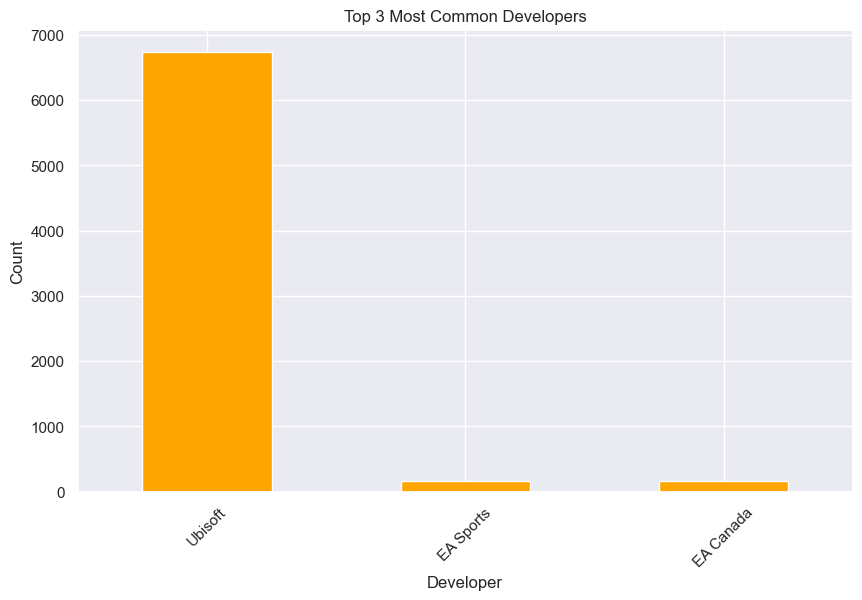

In [72]:
counts = vg['Developer_M'].value_counts().head(3)

plt.figure(figsize = (10, 6))
counts.plot(kind = "bar", color = "orange")

plt.xlabel('Developer', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Top 3 Most Common Developers')
plt.xticks(rotation = 45)  
plt.show()

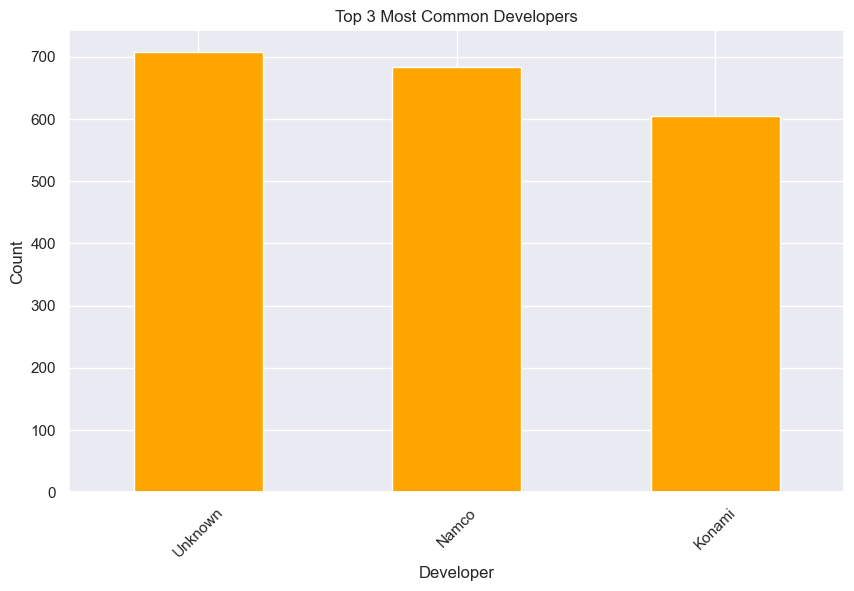

In [73]:
counts = vg['Developer_P'].value_counts().head(3)

plt.figure(figsize = (10, 6))
counts.plot(kind = "bar", color = "orange")

plt.xlabel('Developer', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Top 3 Most Common Developers')
plt.xticks(rotation = 45)  
plt.show()

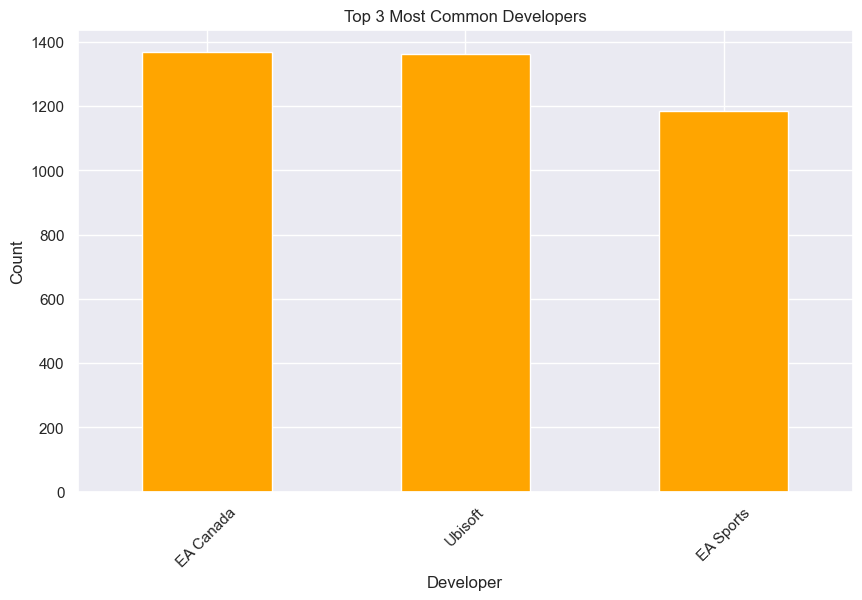

In [74]:
counts = vg['Developer_PP'].value_counts().head(3)

plt.figure(figsize = (10, 6))
counts.plot(kind = "bar", color = "orange")

plt.xlabel('Developer', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Top 3 Most Common Developers')
plt.xticks(rotation = 45)  
plt.show()

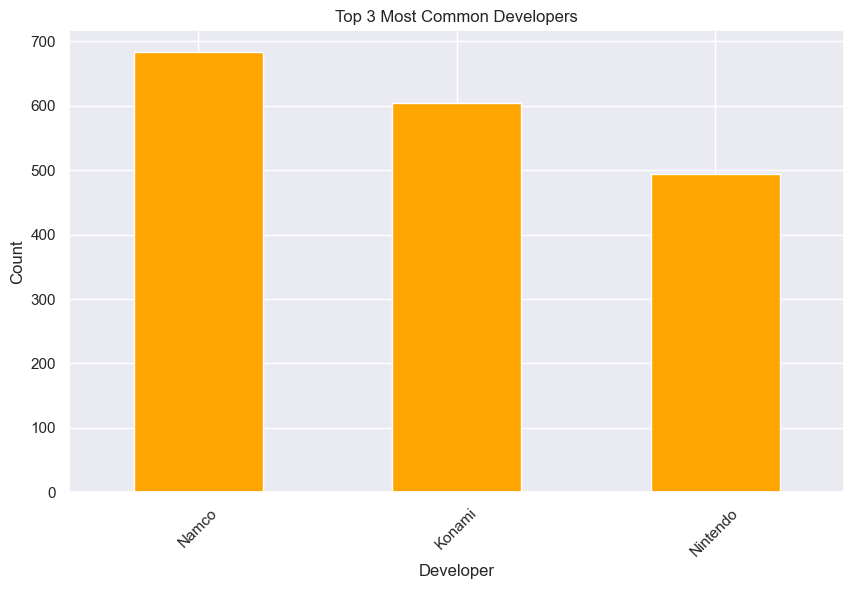

In [76]:
counts = vg['Developer_C1'].value_counts().head(3)

plt.figure(figsize = (10, 6))
counts.plot(kind = "bar", color = "orange")

plt.xlabel('Developer', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Top 3 Most Common Developers')
plt.xticks(rotation = 45)  
plt.show()

In [77]:
vg.tail(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Developer_P,Developer_PP,Developer_C1,Developer_C2,Developer_P_E,Developer_PP_E,Developer_OE,Developer_C1_E,Developer_C2_E,Developer_M_E
16718,Winning Post 8 2016,PSV,2016,Simulation,Tecmo Koei,0.0,0.0,0.01,0.0,0.01,...,Omega Force,TT Games,Omega Force,TT Games,1042,1418,1680,1042,1418,1524


In [78]:
d = pd.DataFrame(vg["Developer"].dropna())

In [79]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9907 entries, 0 to 16710
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Developer  9907 non-null   object
dtypes: object(1)
memory usage: 154.8+ KB


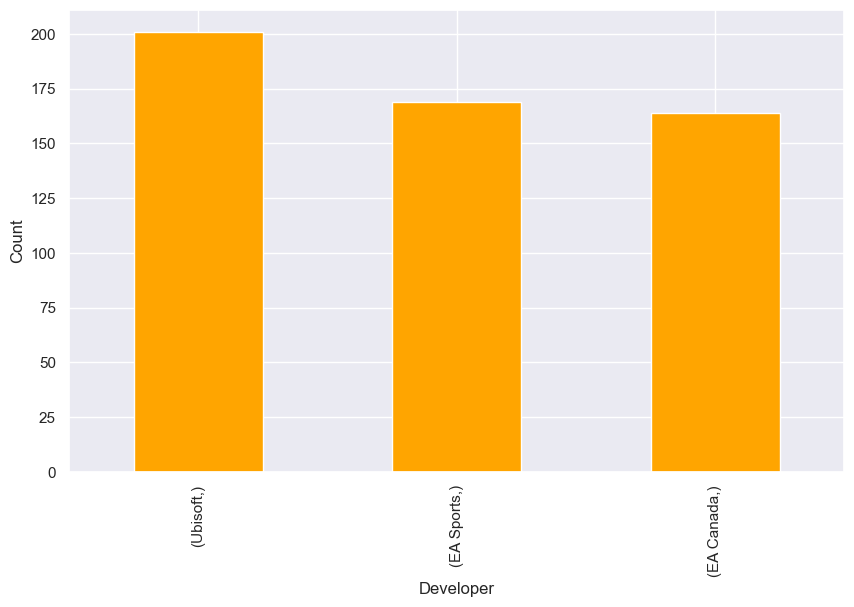

In [80]:
counts = d.value_counts().head(3)
plt.figure(figsize=(10, 6))
counts.plot(kind="bar", color="orange")
plt.xlabel('Developer', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


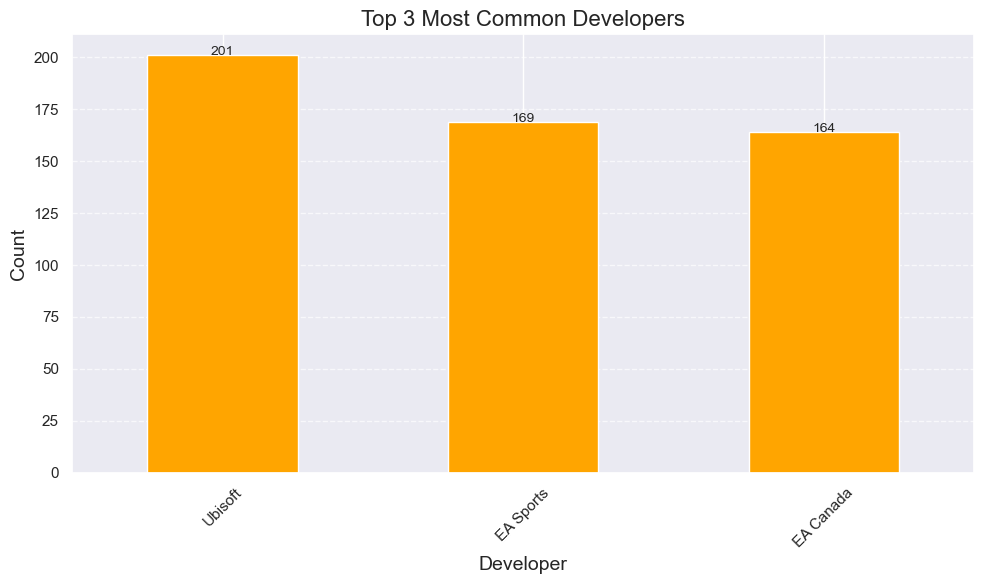

In [81]:
counts = vg['Developer'].value_counts().head(3)

plt.figure(figsize=(10, 6))
counts.plot(kind="bar", color="orange")

plt.xlabel('Developer', fontsize=14)  # Increase font size for better readability
plt.ylabel('Count', fontsize=14)
plt.title('Top 3 Most Common Developers', fontsize=16)  # Increase font size for the title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better interpretation

# Add data labels to the top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', fontsize=10)  

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


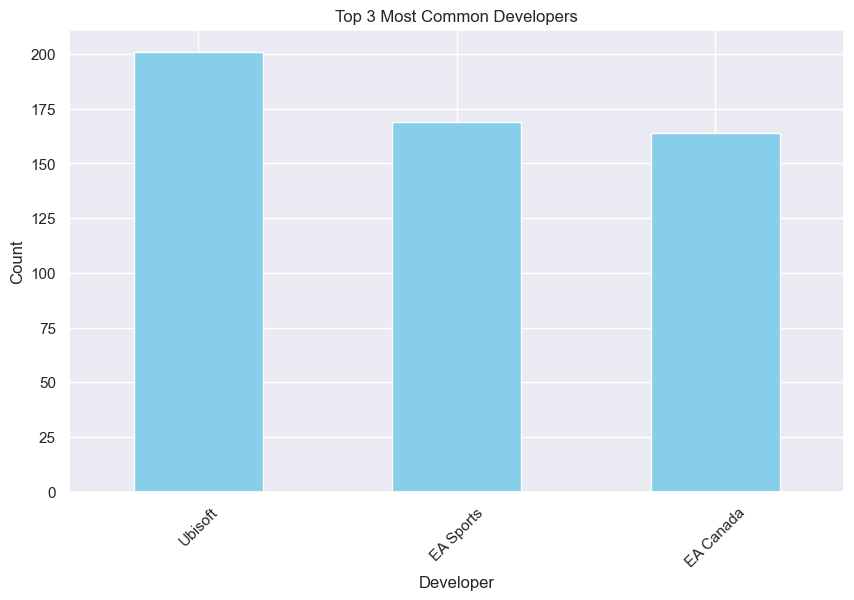

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Count occurrences of each category in the "Developer" column
developer_counts = vg['Developer'].value_counts()

# Step 2: Select the top three categories
top_3_developers = developer_counts.head(3)

# Step 3: Plot the counts of these categories
plt.figure(figsize=(10, 6))
top_3_developers.plot(kind='bar', color='skyblue')
plt.xlabel('Developer', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 3 Most Common Developers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Part 2   [0-10]
You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario. 

In [ ]:
vg.tail(1)

In [ ]:
import seaborn as sns

sns.relplot(data=vg, x="Year_of_Release", y="Global_Sales", hue="Genre", col="Genre", col_wrap=3, kind="line")


In [ ]:
vg["Platform"].nunique()

In [ ]:
import seaborn as sns

# Assuming vg is your DataFrame

sns.relplot(
    data=vg, kind="line",
    x="NA_Sales", y="Global_Sales", hue="Platform",
    sort=False
)


In [ ]:
import seaborn as sns

# Assuming vg is your DataFrame

sns.relplot(
    data=vg, kind="line",
    x="JP_Sales", y="Global_Sales", hue="Platform",
    sort=False
)


In [ ]:
import seaborn as sns

# Assuming vg is your DataFrame

sns.relplot(
    data=vg, kind="line",
    x="EU_Sales", y="Global_Sales", hue="Platform",
    sort=False
)


In [ ]:
import seaborn as sns

# Assuming vg is your DataFrame

sns.relplot(
    data=vg, kind="line",
    x="NA_Sales", y="Global_Sales", hue="Genre",
    sort=False
)


In [ ]:
import seaborn as sns

# Assuming vg is your DataFrame

sns.relplot(
    data=vg, kind="line",
    x="JP_Sales", y="Global_Sales", hue="Genre",
    sort=False
)


In [ ]:
import seaborn as sns

# Assuming vg is your DataFrame

sns.relplot(
    data=vg, kind="line",
    x="EU_Sales", y="Global_Sales", hue="Genre",
    sort=False
)


Reference list
IBM (2023). What is Exploratory Data Analysis? | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/topics/exploratory-data-analysis#:~:text=Exploratory%20data%20analysis%20(EDA)%20is.
IMDb (2018). Advanced search. [online] IMDb. Available at: https://www.imdb.com/search/title/?title_type=video_game&release_date=2018-01-01 [Accessed 1 Apr. 2024].
